## Problem statement
* [Introduction](#Introduction)
* [1. EDA & Data Transformation](#1.-EDA-&-Data-Transformation)
  * [1.1 Checking Missing](#1.1.-Checking-missing-values)
* [2. Feature Engineering](#2.-Feature-Engineering)
  * [2.1 Handling Missing Data](#2.1-Handling-Missing-Data)
  * [2.2 Dealing with Locational Data](#2.2-Dealing-with-Locational-Data)
    * [2.2.1 Kmeans for an Try to Rescue](#2.2.1-Kmeans-for-an-Try-to-Rescue)
  * [2.3 Date_Time conversion](#2.3-Date-Time-conversion)
  * [2.4 Dropping unwanted ](#2.4-Dropping-unwanted )
  * [2.5 Encoding](#2.5-Encoding)
  * [2.6 Text Preprocessing](#2.6-Text-Preprocessing)
  * [2.7 Tfidf Text features](#2.7-Tfidf-Text-features)
  * [2.8 Data Split](#2.8-Data-Split)
* [3 Text Features and categorical Features in Catboost](#3-Text-Features-and-categorical-Features-in-Catboost)

<!-- ## 2.4 Dropping unwanted  -->

# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack, csr_matrix,coo_matrix
import scipy

In [2]:
import nltk
import string
import spacy
en_core = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize.regexp import regexp_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
le=LabelEncoder()



In [3]:
train_df=pd.read_csv('./dataset/train_file.csv')
test_df=pd.read_csv('./dataset/test_file.csv')

In [4]:
train_df

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category
0,6640280,Construction,1924 10TH AVE E,"Alterations to single family residence, (porti...",ADD/ALT,No plan review,"ZHANG, JERRY",2018-01-16T00:00:00,2018-01-16T00:00:00,NaN,2019-07-16T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.636732,-122.319828,"{'latitude': '47.63673222', 'human_address': '...",SINGLE FAMILY / DUPLEX
1,6452959,Construction,9434 DELRIDGE WAY SW,Change use permit from restaurant to residenti...,ADD/ALT,Plan Review,"MARTIN, TERRY",2015-02-13T00:00:00,2015-04-16T00:00:00,2016-11-15T00:00:00,2016-10-16T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.518298,-122.355555,"{'latitude': '47.51829831', 'human_address': '...",COMMERCIAL
2,6435127,Construction,535 TERRY AVE N,Construct interior alterations to existing off...,ADD/ALT,No plan review,"ALLEXSAHT, REBECCA",2014-09-04T00:00:00,2014-09-04T00:00:00,2015-11-20T00:00:00,2016-03-04T00:00:00,Permit Closed,IA/INTERIOR ARCHITECTS,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.624025,-122.337567,"{'latitude': '47.62402492', 'human_address': '...",COMMERCIAL
3,6620870,Demolition,830 4TH AVE S,need to remove a fire escape that is not part ...,DEMOLITION,Plan Review,"JUNK, FRANK",NaN,NaN,NaN,NaN,Initial Information Collected,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.595020,-122.328530,"{'latitude': '47.59502036', 'human_address': '...",COMMERCIAL
4,6363778,Construction,805 NE 106TH ST,"Channel modification to Thornton Creek, stream...",ADD/ALT,Plan Review,"DANIEL, MARK",2013-05-02T00:00:00,2013-12-19T00:00:00,2015-05-14T00:00:00,2015-06-19T00:00:00,Permit Closed,SEATTLE PARKS DEPT,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.705686,-122.320134,"{'latitude': '47.70568601', 'human_address': '...",COMMERCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33534,6093924,Construction,3516 S JUNEAU ST,Interior repairs and modifications to existing...,NaN,Plan Review,"SINGER, BILL",NaN,NaN,NaN,NaN,Initial Information Collected,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.550138,-122.288036,"{'latitude': '47.55013793', 'human_address': '...",SINGLE FAMILY / DUPLEX
33535,6420980,Construction,1106 M L KING JR WAY S,Construct south duplex (units C&D) with one su...,ADD/ALT,Plan Review,"ZHANG, MOON",2014-06-04T00:00:00,2014-09-10T00:00:00,2015-09-01T00:00:00,2016-03-10T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3017193.0,47.592970,-122.297593,"{'latitude': '47.59297026', 'human_address': '...",SINGLE FAMILY / DUPLEX
33536,6429706,Construction,5806 57TH AVE NE,Establish use as and construction of single fa...,NEW,Plan Review,"GAGNON, DON & KARIN",2014-10-08T00:00:00,2014-12-05T00:00:00,2015-09-09T00:00:00,2016-06-05T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.670508,-122.266558,"{'latitude': '47.67050776', 'human_address': '...",SINGLE FAMILY / DUPLEX
33537,6654781,Construction,4216 S KENNY ST,Construction new 1923 s.f. single story wood f...,NEW,Plan Review,"PASTOR, DONALD",NaN,NaN,NaN,NaN,NaN,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.549138,-122.279919,"{'latitude': '47.54913813', 'human_address': '...",SINGLE FAMILY / DUPLEX


## 2. Feature Engineering

## 2.1 Handling Missing Data

In [5]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [8]:
numerical_cols = ['Master Use Permit']
date_cols=['Application Date','Issue Date','Final Date','Expiration Date']
text_cols=['Contractor','Action Type','Applicant Name','Location','Address','Status','Description']

train_df=train_df.update(train_df[numerical_cols].fillna(-999))
train_df.update(train_df[text_cols].fillna(''))
print(train_df.isna().sum())
print('\n'+'Testing Data Null values\n')
test_df.update(test_df[numerical_cols].fillna(-999))
test_df.update(test_df[text_cols].fillna(''))
# print(test_df.isna().sum())

Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    6939
Issue Date                         10624
Final Date                         17851
Expiration Date                    10569
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                      0
Latitude                              21
Longitude                             21
Location                               0
Category                               0
dtype: int64

Testing Data Null values



## 2.2 Dealing with Locational Data

## 2.2.1 Kmeans for an Try to Rescue 

In [19]:

train_Location=train_df[['Latitude','Longitude']].dropna()
test_Location=test_df[['Latitude','Longitude']].dropna()

from sklearn.cluster import KMeans
clusters=10
kmeans=KMeans(n_clusters=clusters,random_state=0).fit(train_Location[['Latitude','Longitude']].values)


Text(0.5, 0, 'Latitude')

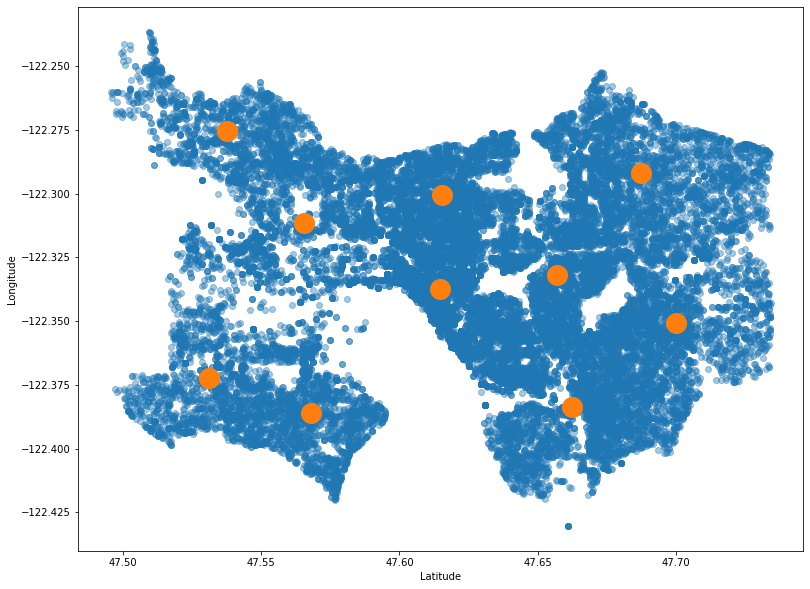

In [20]:
fig,ax1=plt.subplots(figsize=(13,10))
ax1.scatter(train_Location.Latitude,train_Location.Longitude,alpha=0.4,label='samples')
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers',s=400)
ax1.set_ylabel('Longitude')
ax1.set_xlabel('Latitude')

Text(0.5, 0, 'Latitude')

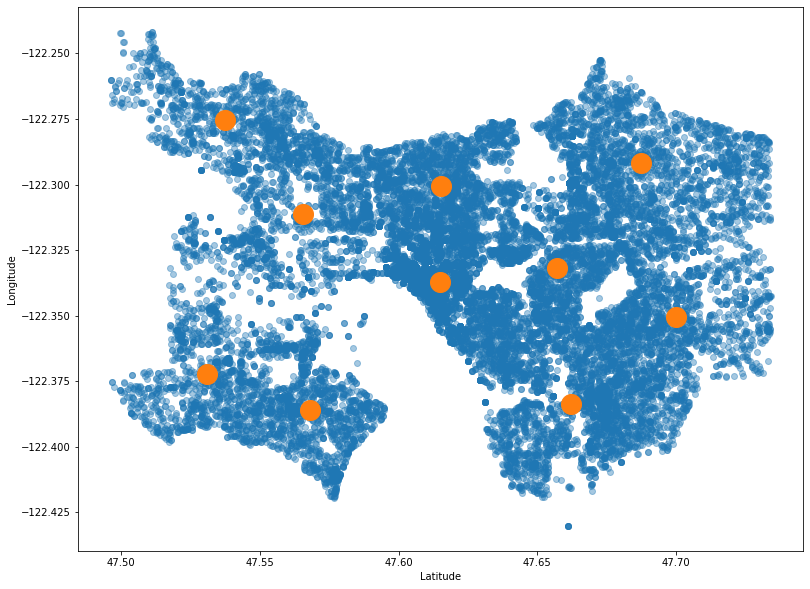

In [21]:
fig,ax1=plt.subplots(figsize=(13,10))
ax1.scatter(test_Location.Latitude,test_Location.Longitude,alpha=0.4,label='samples')
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers',s=400)
ax1.set_ylabel('Longitude')
ax1.set_xlabel('Latitude')

In [22]:
kmean_feats=pd.DataFrame(kmeans.fit_transform(train_Location[['Latitude','Longitude']].values),columns=['gspatial_' + str(i) for i in range(clusters)])
kmean_feats_test=pd.DataFrame(kmeans.fit_transform(test_Location[['Latitude','Longitude']].values),columns=['gspatial_' + str(i) for i in range(clusters)])

In [23]:
kmean_feats

,gspatial_0,gspatial_1,gspatial_2,gspatial_3,gspatial_4,gspatial_5,gspatial_6,gspatial_7,gspatial_8,gspatial_9
0,0.095233,0.028830,0.068724,0.028037,0.023626,0.118011,0.108603,0.071717,0.070263,0.057883
1,0.058398,0.111416,0.146573,0.098203,0.140750,0.021202,0.082588,0.064709,0.181648,0.180689
2,0.073879,0.037976,0.059831,0.009244,0.033504,0.099254,0.106462,0.064122,0.076973,0.078162
3,0.063367,0.034457,0.086877,0.021613,0.062116,0.077553,0.078250,0.034154,0.107165,0.099383
4,0.152440,0.092536,0.077029,0.092503,0.050042,0.182253,0.173884,0.140441,0.031052,0.033807
...,...,...,...,...,...,...,...,...,...,...
33513,0.099542,0.066299,0.147289,0.081264,0.115553,0.086536,0.017827,0.027904,0.162301,0.137254
33514,0.091750,0.022466,0.110437,0.045284,0.072678,0.097115,0.059617,0.030687,0.119346,0.094553
33515,0.157230,0.064930,0.117419,0.090033,0.066707,0.175063,0.133106,0.114127,0.089063,0.030288
33516,0.107706,0.069259,0.153419,0.087174,0.119771,0.094275,0.012356,0.035414,0.166506,0.138708


In [24]:
kmean_feats=pd.DataFrame(kmeans.fit_transform(train_Location[['Latitude','Longitude']].values),index=np.unique(np.where(train_df[['Longitude','Latitude']].notna())),columns=['gspatial_' + str(i) for i in range(clusters)])
train_df=pd.concat([train_df,kmean_feats],axis=1)
train_df.isna().sum()

Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    6939
Issue Date                         10624
Final Date                         17851
Expiration Date                    10569
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                      0
Latitude                              21
Longitude                             21
Location                               0
Category                               0
gspatial_0                            21
gspatial_1                            21
gspatial_2                            21
gspatial_3                            21
gspatial_4                            21
gspatial_5      

In [25]:
kmean_feats_test=pd.DataFrame(kmeans.fit_transform(test_Location[['Latitude','Longitude']].values),index=np.unique(np.where(test_df[['Longitude','Latitude']].notna())),columns=['gspatial_' + str(i) for i in range(clusters)])
test_df=pd.concat([test_df,kmean_feats_test],axis=1)
test_df.isna().sum()

Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    4497
Issue Date                          6941
Final Date                         11961
Expiration Date                     6915
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                      0
Latitude                              16
Longitude                             16
Location                               0
gspatial_0                            16
gspatial_1                            16
gspatial_2                            16
gspatial_3                            16
gspatial_4                            16
gspatial_5                            16
gspatial_6      

## folium to visualize

In [15]:
train_Location=train_df[['Latitude','Longitude']].dropna()
test_Location=test_df[['Latitude','Longitude']].dropna()

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; width:75em}</style>"))

In [26]:
import folium

m=folium.Map(location=[train_Location['Latitude'].mean(),train_Location['Longitude'].mean()],zoom_start=5,tiles='Stamen toner')

for _,row in (train_Location[:100].iterrows()):
    folium.CircleMarker([row.Latitude,row.Longitude],
    radius=5,
    color='orange',
    fill=True,
    fill_color='orange').add_to(m)
m

In [43]:
# for _,row in (train_Location[101:300].iterrows()):
#     folium.CircleMarker([row.Latitude,row.Longitude],
#     radius=5,
#     color='orange',
#     fill=True,
#     fill_color='orange').add_to(m)
# m

In [44]:

# for _,row in (train_Location[ 400:700].iterrows()):
#     folium.CircleMarker([row.Latitude,row.Longitude],
#     radius=5,
#     color='orange',
#     fill=True,
#     fill_color='orange').add_to(m)
# m

In [45]:

# for _,row in (train_Location[ 700:1100].iterrows()):
#     folium.CircleMarker([row.Latitude,row.Longitude],
#     radius=5,
#     color='orange',
#     fill=True,
#     fill_color='orange').add_to(m)
# m

## DBScan and Optic Clustering to make it Better

In [46]:
# from sklearn.cluster import DBSCAN
# kms_per_radian = 63.0088
# epsilon = 5 / kms_per_radian
# db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine',n_job).fit(np.radians(train_Location[:10]))
# cluster_labels = db.labels_
# num_clusters = len(set(cluster_labels))
# clusters = pd.Series([train_Location{:10}[cluster_labels == n] for n in range(num_clusters)])
# print('Number of clusters: {}'.format(num_clusters))


## 2.3 Date Time conversion

In [17]:
print("\nCreate Day Variables")

train_df['Application Date'] = pd.to_datetime(train_df['Application Date'], format='%Y-%m-%d')
train_df['Issue Date'] = pd.to_datetime(train_df['Issue Date'], format='%Y-%m-%d')
train_df['Final Date'] = pd.to_datetime(train_df['Final Date'], format='%Y-%m-%d')
train_df['Expiration Date'] = pd.to_datetime(train_df['Expiration Date'], format='%Y-%m-%d')
    
    
train_df['App_day'] = train_df['Application Date'].dt.day
train_df['Issue_Day'] = train_df['Issue Date'].dt.day
train_df['Final_Day'] = train_df['Final Date'].dt.day
train_df['Exp_Day']   = train_df['Expiration Date'].dt.day

train_df['App_week'] = train_df['Application Date'].dt.week
train_df['Issue_week'] = train_df['Issue Date'].dt.week
train_df['Final_week'] = train_df['Final Date'].dt.week
train_df['Exp_week']   = train_df['Expiration Date'].dt.week
train_df.isna().sum()   


Create Day Variables


<ipython-input-17-c8ade5253844>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['App_week'] = train_df['Application Date'].dt.week
<ipython-input-17-c8ade5253844>:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Issue_week'] = train_df['Issue Date'].dt.week
<ipython-input-17-c8ade5253844>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Final_week'] = train_df['Final Date'].dt.week
<ipython-input-17-c8ade5253844>:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Exp_week']   = train_df['Expiration Date'].dt.week


Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    6939
Issue Date                         10624
Final Date                         17851
Expiration Date                    10569
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                      0
Latitude                              21
Longitude                             21
Location                               0
Category                               0
gspatial_0                            21
gspatial_1                            21
gspatial_2                            21
gspatial_3                            21
gspatial_4                            21
gspatial_5      

In [18]:
train_df[date_cols]

,Application Date,Issue Date,Final Date,Expiration Date
0,2018-01-16,2018-01-16,NaT,2019-07-16
1,2015-02-13,2015-04-16,2016-11-15,2016-10-16
2,2014-09-04,2014-09-04,2015-11-20,2016-03-04
3,NaT,NaT,NaT,NaT
4,2013-05-02,2013-12-19,2015-05-14,2015-06-19
...,...,...,...,...
33534,NaT,NaT,NaT,NaT
33535,2014-06-04,2014-09-10,2015-09-01,2016-03-10
33536,2014-10-08,2014-12-05,2015-09-09,2016-06-05
33537,NaT,NaT,NaT,NaT


In [19]:

test_df['Application Date'] = pd.to_datetime(test_df['Application Date'], format='%Y-%m-%d')
test_df['Issue Date'] = pd.to_datetime(test_df['Issue Date'], format='%Y-%m-%d')
test_df['Final Date'] = pd.to_datetime(test_df['Final Date'], format='%Y-%m-%d')
test_df['Expiration Date'] = pd.to_datetime(test_df['Expiration Date'], format='%Y-%m-%d')

test_df['App_day'] = test_df['Application Date'].dt.day
test_df['Issue_Day'] = test_df['Issue Date'].dt.day
test_df['Final_Day'] = test_df['Final Date'].dt.day
test_df['Exp_Day'] = test_df['Expiration Date'].dt.day

test_df['App_week'] = test_df['Application Date'].dt.week
test_df['Issue_week'] = test_df['Issue Date'].dt.week
test_df['Final_week'] = test_df['Final Date'].dt.week
test_df['Exp_week'] = test_df['Expiration Date'].dt.week
test_df.isna().sum()   

<ipython-input-19-fa482ddcd1ab>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['App_week'] = test_df['Application Date'].dt.week
<ipython-input-19-fa482ddcd1ab>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Issue_week'] = test_df['Issue Date'].dt.week
<ipython-input-19-fa482ddcd1ab>:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Final_week'] = test_df['Final Date'].dt.week
<ipython-input-19-fa482ddcd1ab>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Exp_week'] = test_df['Expiration Date'].dt.week


Application/Permit Number              0
Permit Type                            0
Address                                0
Description                            0
Action Type                            0
Work Type                              0
Applicant Name                         0
Application Date                    4497
Issue Date                          6941
Final Date                         11961
Expiration Date                     6915
Status                                 0
Contractor                             0
Permit and Complaint Status URL        0
Master Use Permit                      0
Latitude                              16
Longitude                             16
Location                               0
gspatial_0                            16
gspatial_1                            16
gspatial_2                            16
gspatial_3                            16
gspatial_4                            16
gspatial_5                            16
gspatial_6      

## 2.4 Dropping unwanted 

In [20]:
date_cols

['Application Date', 'Issue Date', 'Final Date', 'Expiration Date']

In [21]:
train_df=train_df.drop(columns=['Permit and Complaint Status URL'])
# train_df=train_df.drop(columns=['Applicant Name'])
train_df=train_df.drop(columns=date_cols)

train_df=train_df.drop(columns=['Latitude','Longitude','Address','Location'])
train_df.isna().sum()

test_df=test_df.drop(columns=['Permit and Complaint Status URL'])
# test_df=test_df.drop(columns=['Applicant Name'])

test_df=test_df.drop(columns=date_cols)
test_df=test_df.drop(columns=['Latitude','Longitude','Address','Location'])
test_df.isna().sum()

Application/Permit Number        0
Permit Type                      0
Description                      0
Action Type                      0
Work Type                        0
Applicant Name                   0
Status                           0
Contractor                       0
Master Use Permit                0
gspatial_0                      16
gspatial_1                      16
gspatial_2                      16
gspatial_3                      16
gspatial_4                      16
gspatial_5                      16
gspatial_6                      16
gspatial_7                      16
gspatial_8                      16
gspatial_9                      16
App_day                       4497
Issue_Day                     6941
Final_Day                    11961
Exp_Day                       6915
App_week                      4497
Issue_week                    6941
Final_week                   11961
Exp_week                      6915
dtype: int64

In [22]:
for i in range(0,clusters):
    train_df['gspatial_'+ str(i)]=train_df['gspatial_'+ str(i)].fillna(-999)
day_week_cols=['App_day','Issue_Day','Final_Day','Exp_Day','App_week','Issue_week','Final_week','Exp_week']
for col in day_week_cols:
    train_df[col]=train_df[col].fillna(-999)

train_df.isna().sum()      

for i in range(0,clusters):
    test_df['gspatial_'+ str(i)]=test_df['gspatial_'+ str(i)].fillna(-999)
day_week_cols=['App_day','Issue_Day','Final_Day','Exp_Day','App_week','Issue_week','Final_week','Exp_week']
for col in day_week_cols:
    test_df[col]=test_df[col].fillna(-999)

test_df.isna().sum()   

Application/Permit Number    0
Permit Type                  0
Description                  0
Action Type                  0
Work Type                    0
Applicant Name               0
Status                       0
Contractor                   0
Master Use Permit            0
gspatial_0                   0
gspatial_1                   0
gspatial_2                   0
gspatial_3                   0
gspatial_4                   0
gspatial_5                   0
gspatial_6                   0
gspatial_7                   0
gspatial_8                   0
gspatial_9                   0
App_day                      0
Issue_Day                    0
Final_Day                    0
Exp_Day                      0
App_week                     0
Issue_week                   0
Final_week                   0
Exp_week                     0
dtype: int64

## 2.5 Encoding

In [23]:
num_col=[]
obj_col=[]

num_col = numerical_cols+['gspatial_'+ str(i) for i in range(0,clusters)]+day_week_cols
obj_col=[col for col in train_df if col not in num_col]

obj_col.remove('Description')
obj_col.remove('Category')

# obj_col.remove('Applicant Name')
# obj_col.remove('Status')


In [24]:
# train_df=pd.concat([train_df,categorical_features],axis=1)

## 2.6 Text Preprocessing

In [25]:
#### train
train_df['Description'] = train_df['Description'].fillna('')
train_df['clean_description']=[' '.join([w for w in x.lower().split() if w not in stop]) for x in train_df['Description'].tolist()]
##### test
test_df['Description'] = test_df['Description'].fillna('')
test_df['clean_description']=[' '.join([w for w in x.lower().split() if w not in stop]) for x in test_df['Description'].tolist()]

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '',string.punctuation))

def lemmatize(text):
    tokens=regexp_tokenize(text,pattern='\s+',gaps=True) #https://towardsdatascience.com/benchmarking-python-nlp-tokenizers-3ac4735100c5
    return ' '.join([lemmatizer.lemmatize(w) for w in tokens])
###### Train
train_df['clean_description']=train_df['clean_description'].apply(lemmatize)
train_df['clean_description']=train_df['clean_description'].apply(remove_punctuation)
# print(train_df['clean_description'])

#### Test
test_df['clean_description']=test_df['clean_description'].apply(lemmatize)
test_df['clean_description']=test_df['clean_description'].apply(remove_punctuation)
# print(train_df['clean_description'])

train_df=train_df.drop('Description',axis=1)
test_df=test_df.drop('Description',axis=1)    

## 2.7 Tfidf Text features

In [26]:
# pip install texthero
# import texthero as hero

# df['tfidf'] = hero.tfidf(df['sent'])

In [27]:
########## singular column
text_cols=['clean_description']
text_cols
from sklearn.feature_extraction.text import TfidfVectorizer
def text_features_uni(df):
    for cols in text_cols:
        
        df[cols] = df[cols].astype(str) 
        df[cols] = df[cols].astype(str).fillna('') # FILL NA
        
        df[cols] = df[cols].str.lower() # Lowercase all text, so that capitalized words dont get treated differently
        df[cols] = df[cols].astype(str).fillna('missing') # FILL NA
        
        df[cols +'_nos_removed']=df[cols].str.replace('\d+', '')
        

        df[cols + '_num_words'] = df[cols].apply(lambda comment: len(comment.split())) # Count number of Words
        df[cols + '_num_unique_words'] = df[cols].apply(lambda comment: len(set(w for w in comment.split())))
        df[cols + '_words_vs_unique'] = df[cols+'_num_unique_words'] / df[cols+'_num_words'] * 100 # Count Unique Words
    return df
    

    print("\n[TF-IDF] Term Frequency Inverse Document Frequency Stage")

train_df=text_features_uni(train_df)
test_df=text_features_uni(test_df)

train_df=train_df.drop('clean_description',axis=1)
test_df=test_df.drop('clean_description',axis=1)


<ipython-input-27-100c72c610da>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df[cols +'_nos_removed']=df[cols].str.replace('\d+', '')


In [28]:
train_df.columns

Index(['Application/Permit Number', 'Permit Type', 'Action Type', 'Work Type',
       'Applicant Name', 'Status', 'Contractor', 'Master Use Permit',
       'Category', 'gspatial_0', 'gspatial_1', 'gspatial_2', 'gspatial_3',
       'gspatial_4', 'gspatial_5', 'gspatial_6', 'gspatial_7', 'gspatial_8',
       'gspatial_9', 'App_day', 'Issue_Day', 'Final_Day', 'Exp_Day',
       'App_week', 'Issue_week', 'Final_week', 'Exp_week',
       'clean_description_nos_removed', 'clean_description_num_words',
       'clean_description_num_unique_words',
       'clean_description_words_vs_unique'],
      dtype='object')

In [29]:
# train_df['Application/Permit Number']=le.fit_transform(train_df['Application/Permit Number'])
# obj_col.remove('Application/Permit Number')
# test_df['Application/Permit Number']=le.fit_transform(test_df['Application/Permit Number'])
train_df['clean_description_words_vs_unique']=train_df['clean_description_words_vs_unique'].fillna(0)
test_df['clean_description_words_vs_unique']=test_df['clean_description_words_vs_unique'].fillna(0)
# print(test_df.isna().sum())
# print(train_df.isna().sum())

In [30]:
print(len(train_df.columns))
print(len(test_df.columns))
print(obj_col)

31
30
['Application/Permit Number', 'Permit Type', 'Action Type', 'Work Type', 'Applicant Name', 'Status', 'Contractor']


## 2.8 Data Split

In [31]:
from sklearn.model_selection import train_test_split
y=train_df['Category']
X=train_df.drop('Category',axis=1)
y=le.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test= train_test_split(X,y,shuffle=True,test_size=0.25)

In [33]:
# import lightgbm
# import time
import catboost
from catboost import CatBoostClassifier,Pool
from catboost.utils import get_gpu_device_count
print('\n%i GPU devices available' % get_gpu_device_count())



1 GPU devices available


# 3 Text Features and categorical Features in Catboost

issue while CPU and AUC
CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/libs/train_lib/train_model.cpp:689: Feature calcers are not supported in CPU training yet

issue while GPU and AUC

warning AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time

issue: CatBoostError: c:/program files (x86)/go 
agent/pipelines/buildmaster/catboost.git/catboost/cuda/targets/gpu_metrics.cpp:662: Eval metric should have a single value. Metric MultiClass provides a value for each class, thus it cannot be used as a single value to select best iteration or to detect overfitting. If you just want to look on the values of this metric use custom_metric parameter.


In [34]:
catboost_model=CatBoostClassifier(iterations=1500,
                                  depth=10,
                                  learning_rate=0.02,
                                  eval_metric='Accuracy',
                                  loss_function='MultiClass',
                                  task_type="GPU")

train_pool=Pool(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'])
test_pool=Pool(X_test,y_test,cat_features=obj_col,text_features=['clean_description_nos_removed'])
catboost_model.fit(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'],eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8700406	test: 0.8622540	best: 0.8622540 (0)	total: 212ms	remaining: 5m 18s
1:	learn: 0.8721476	test: 0.8646392	best: 0.8646392 (1)	total: 384ms	remaining: 4m 47s
2:	learn: 0.8721873	test: 0.8666667	best: 0.8666667 (2)	total: 531ms	remaining: 4m 25s
3:	learn: 0.8714320	test: 0.8657126	best: 0.8666667 (2)	total: 684ms	remaining: 4m 15s
4:	learn: 0.8713127	test: 0.8663089	best: 0.8666667 (2)	total: 830ms	remaining: 4m 8s
5:	learn: 0.8711934	test: 0.8669052	best: 0.8669052 (5)	total: 1s	remaining: 4m 9s
6:	learn: 0.8714320	test: 0.8682171	best: 0.8682171 (6)	total: 1.14s	remaining: 4m 2s
7:	learn: 0.8716705	test: 0.8680978	best: 0.8682171 (6)	total: 1.31s	remaining: 4m 4s
8:	learn: 0.8716705	test: 0.8683363	best: 0.8683363 (8)	total: 1.45s	remaining: 4m
9:	learn: 0.8730222	test: 0.8683363	best: 0.8683363 (8)	total: 1.61s	remaining: 3m 59s
10:	learn: 0.8731414	test: 0.8691711	best: 0.8691711 (10)	total: 1.77s	remaining: 3m 59s
11:	learn: 0.8727837	test: 0.8683363	best: 0.8691711

93:	learn: 0.8847499	test: 0.8778772	best: 0.8782349 (78)	total: 14.4s	remaining: 3m 36s
94:	learn: 0.8849885	test: 0.8782349	best: 0.8782349 (78)	total: 14.6s	remaining: 3m 35s
95:	learn: 0.8850680	test: 0.8782349	best: 0.8782349 (78)	total: 14.7s	remaining: 3m 35s
96:	learn: 0.8853463	test: 0.8781157	best: 0.8782349 (78)	total: 14.8s	remaining: 3m 34s
97:	learn: 0.8853463	test: 0.8782349	best: 0.8782349 (78)	total: 15s	remaining: 3m 34s
98:	learn: 0.8853860	test: 0.8783542	best: 0.8783542 (98)	total: 15.2s	remaining: 3m 34s
99:	learn: 0.8853065	test: 0.8785927	best: 0.8785927 (99)	total: 15.3s	remaining: 3m 34s
100:	learn: 0.8854258	test: 0.8784735	best: 0.8785927 (99)	total: 15.4s	remaining: 3m 33s
101:	learn: 0.8857438	test: 0.8784735	best: 0.8785927 (99)	total: 15.6s	remaining: 3m 33s
102:	learn: 0.8857438	test: 0.8787120	best: 0.8787120 (102)	total: 15.7s	remaining: 3m 33s
103:	learn: 0.8859823	test: 0.8784735	best: 0.8787120 (102)	total: 15.9s	remaining: 3m 33s
104:	learn: 0.886

185:	learn: 0.8931383	test: 0.8822898	best: 0.8825283 (177)	total: 27.3s	remaining: 3m 12s
186:	learn: 0.8931780	test: 0.8822898	best: 0.8825283 (177)	total: 27.4s	remaining: 3m 12s
187:	learn: 0.8932575	test: 0.8824091	best: 0.8825283 (177)	total: 27.6s	remaining: 3m 12s
188:	learn: 0.8933768	test: 0.8825283	best: 0.8825283 (177)	total: 27.7s	remaining: 3m 12s
189:	learn: 0.8935358	test: 0.8826476	best: 0.8826476 (189)	total: 27.8s	remaining: 3m 11s
190:	learn: 0.8933768	test: 0.8826476	best: 0.8826476 (189)	total: 27.9s	remaining: 3m 11s
191:	learn: 0.8933768	test: 0.8826476	best: 0.8826476 (189)	total: 28s	remaining: 3m 11s
192:	learn: 0.8933768	test: 0.8827668	best: 0.8827668 (192)	total: 28.2s	remaining: 3m 10s
193:	learn: 0.8937744	test: 0.8828861	best: 0.8828861 (193)	total: 28.3s	remaining: 3m 10s
194:	learn: 0.8934961	test: 0.8827668	best: 0.8828861 (193)	total: 28.4s	remaining: 3m 10s
195:	learn: 0.8938141	test: 0.8826476	best: 0.8828861 (193)	total: 28.6s	remaining: 3m 10s
1

277:	learn: 0.8981474	test: 0.8856291	best: 0.8858676 (273)	total: 38.3s	remaining: 2m 48s
278:	learn: 0.8982269	test: 0.8856291	best: 0.8858676 (273)	total: 38.4s	remaining: 2m 48s
279:	learn: 0.8982667	test: 0.8857484	best: 0.8858676 (273)	total: 38.5s	remaining: 2m 47s
280:	learn: 0.8981872	test: 0.8858676	best: 0.8858676 (273)	total: 38.6s	remaining: 2m 47s
281:	learn: 0.8982667	test: 0.8857484	best: 0.8858676 (273)	total: 38.7s	remaining: 2m 47s
282:	learn: 0.8984257	test: 0.8858676	best: 0.8858676 (273)	total: 38.9s	remaining: 2m 47s
283:	learn: 0.8983859	test: 0.8861061	best: 0.8861061 (283)	total: 39s	remaining: 2m 46s
284:	learn: 0.8985052	test: 0.8863447	best: 0.8863447 (284)	total: 39.1s	remaining: 2m 46s
285:	learn: 0.8986642	test: 0.8863447	best: 0.8863447 (284)	total: 39.2s	remaining: 2m 46s
286:	learn: 0.8985450	test: 0.8862254	best: 0.8863447 (284)	total: 39.3s	remaining: 2m 46s
287:	learn: 0.8985052	test: 0.8862254	best: 0.8863447 (284)	total: 39.4s	remaining: 2m 45s
2

368:	learn: 0.9028783	test: 0.8886106	best: 0.8886106 (352)	total: 48.8s	remaining: 2m 29s
369:	learn: 0.9026795	test: 0.8886106	best: 0.8886106 (352)	total: 48.9s	remaining: 2m 29s
370:	learn: 0.9026397	test: 0.8888491	best: 0.8888491 (370)	total: 49s	remaining: 2m 29s
371:	learn: 0.9026795	test: 0.8888491	best: 0.8888491 (370)	total: 49.1s	remaining: 2m 28s
372:	learn: 0.9028783	test: 0.8888491	best: 0.8888491 (370)	total: 49.2s	remaining: 2m 28s
373:	learn: 0.9027590	test: 0.8889684	best: 0.8889684 (373)	total: 49.3s	remaining: 2m 28s
374:	learn: 0.9029180	test: 0.8889684	best: 0.8889684 (373)	total: 49.4s	remaining: 2m 28s
375:	learn: 0.9029975	test: 0.8892069	best: 0.8892069 (375)	total: 49.5s	remaining: 2m 28s
376:	learn: 0.9029578	test: 0.8892069	best: 0.8892069 (375)	total: 49.6s	remaining: 2m 27s
377:	learn: 0.9030373	test: 0.8892069	best: 0.8892069 (375)	total: 49.8s	remaining: 2m 27s
378:	learn: 0.9030770	test: 0.8892069	best: 0.8892069 (375)	total: 49.9s	remaining: 2m 27s
3

460:	learn: 0.9062177	test: 0.8901610	best: 0.8905188 (447)	total: 59.4s	remaining: 2m 13s
461:	learn: 0.9061382	test: 0.8901610	best: 0.8905188 (447)	total: 59.6s	remaining: 2m 13s
462:	learn: 0.9061779	test: 0.8901610	best: 0.8905188 (447)	total: 59.7s	remaining: 2m 13s
463:	learn: 0.9063370	test: 0.8902803	best: 0.8905188 (447)	total: 59.8s	remaining: 2m 13s
464:	learn: 0.9063370	test: 0.8901610	best: 0.8905188 (447)	total: 59.9s	remaining: 2m 13s
465:	learn: 0.9064165	test: 0.8902803	best: 0.8905188 (447)	total: 1m	remaining: 2m 13s
466:	learn: 0.9064165	test: 0.8902803	best: 0.8905188 (447)	total: 1m	remaining: 2m 13s
467:	learn: 0.9063370	test: 0.8902803	best: 0.8905188 (447)	total: 1m	remaining: 2m 12s
468:	learn: 0.9065357	test: 0.8903995	best: 0.8905188 (447)	total: 1m	remaining: 2m 12s
469:	learn: 0.9065357	test: 0.8903995	best: 0.8905188 (447)	total: 1m	remaining: 2m 12s
470:	learn: 0.9065357	test: 0.8902803	best: 0.8905188 (447)	total: 1m	remaining: 2m 12s
471:	learn: 0.906

552:	learn: 0.9095969	test: 0.8908766	best: 0.8911151 (524)	total: 1m 10s	remaining: 2m
553:	learn: 0.9095571	test: 0.8908766	best: 0.8911151 (524)	total: 1m 10s	remaining: 2m
554:	learn: 0.9096764	test: 0.8912343	best: 0.8912343 (554)	total: 1m 10s	remaining: 1m 59s
555:	learn: 0.9096764	test: 0.8912343	best: 0.8912343 (554)	total: 1m 10s	remaining: 1m 59s
556:	learn: 0.9097559	test: 0.8912343	best: 0.8912343 (554)	total: 1m 10s	remaining: 1m 59s
557:	learn: 0.9097957	test: 0.8912343	best: 0.8912343 (554)	total: 1m 10s	remaining: 1m 59s
558:	learn: 0.9099149	test: 0.8911151	best: 0.8912343 (554)	total: 1m 10s	remaining: 1m 59s
559:	learn: 0.9099944	test: 0.8912343	best: 0.8912343 (554)	total: 1m 10s	remaining: 1m 59s
560:	learn: 0.9100342	test: 0.8913536	best: 0.8913536 (560)	total: 1m 11s	remaining: 1m 59s
561:	learn: 0.9101535	test: 0.8913536	best: 0.8913536 (560)	total: 1m 11s	remaining: 1m 58s
562:	learn: 0.9101137	test: 0.8913536	best: 0.8913536 (560)	total: 1m 11s	remaining: 1m 

643:	learn: 0.9134134	test: 0.8925462	best: 0.8926655 (640)	total: 1m 20s	remaining: 1m 47s
644:	learn: 0.9134531	test: 0.8927847	best: 0.8927847 (644)	total: 1m 20s	remaining: 1m 47s
645:	learn: 0.9136519	test: 0.8926655	best: 0.8927847 (644)	total: 1m 20s	remaining: 1m 46s
646:	learn: 0.9135724	test: 0.8926655	best: 0.8927847 (644)	total: 1m 21s	remaining: 1m 46s
647:	learn: 0.9136519	test: 0.8926655	best: 0.8927847 (644)	total: 1m 21s	remaining: 1m 46s
648:	learn: 0.9135724	test: 0.8926655	best: 0.8927847 (644)	total: 1m 21s	remaining: 1m 46s
649:	learn: 0.9135326	test: 0.8925462	best: 0.8927847 (644)	total: 1m 21s	remaining: 1m 46s
650:	learn: 0.9135724	test: 0.8926655	best: 0.8927847 (644)	total: 1m 21s	remaining: 1m 46s
651:	learn: 0.9136519	test: 0.8926655	best: 0.8927847 (644)	total: 1m 21s	remaining: 1m 46s
652:	learn: 0.9137314	test: 0.8927847	best: 0.8927847 (644)	total: 1m 21s	remaining: 1m 45s
653:	learn: 0.9137712	test: 0.8927847	best: 0.8927847 (644)	total: 1m 21s	remain

733:	learn: 0.9160770	test: 0.8914729	best: 0.8927847 (644)	total: 1m 31s	remaining: 1m 35s
734:	learn: 0.9160770	test: 0.8914729	best: 0.8927847 (644)	total: 1m 31s	remaining: 1m 35s
735:	learn: 0.9161167	test: 0.8913536	best: 0.8927847 (644)	total: 1m 31s	remaining: 1m 35s
736:	learn: 0.9160372	test: 0.8915921	best: 0.8927847 (644)	total: 1m 31s	remaining: 1m 35s
737:	learn: 0.9161167	test: 0.8915921	best: 0.8927847 (644)	total: 1m 31s	remaining: 1m 34s
738:	learn: 0.9161167	test: 0.8914729	best: 0.8927847 (644)	total: 1m 32s	remaining: 1m 34s
739:	learn: 0.9161962	test: 0.8914729	best: 0.8927847 (644)	total: 1m 32s	remaining: 1m 34s
740:	learn: 0.9162360	test: 0.8914729	best: 0.8927847 (644)	total: 1m 32s	remaining: 1m 34s
741:	learn: 0.9162360	test: 0.8915921	best: 0.8927847 (644)	total: 1m 32s	remaining: 1m 34s
742:	learn: 0.9162757	test: 0.8914729	best: 0.8927847 (644)	total: 1m 32s	remaining: 1m 34s
743:	learn: 0.9164348	test: 0.8914729	best: 0.8927847 (644)	total: 1m 32s	remain

823:	learn: 0.9180647	test: 0.8933810	best: 0.8933810 (822)	total: 1m 41s	remaining: 1m 23s
824:	learn: 0.9181045	test: 0.8931425	best: 0.8933810 (822)	total: 1m 41s	remaining: 1m 23s
825:	learn: 0.9181840	test: 0.8932618	best: 0.8933810 (822)	total: 1m 41s	remaining: 1m 23s
826:	learn: 0.9183828	test: 0.8931425	best: 0.8933810 (822)	total: 1m 42s	remaining: 1m 23s
827:	learn: 0.9182635	test: 0.8931425	best: 0.8933810 (822)	total: 1m 42s	remaining: 1m 22s
828:	learn: 0.9184623	test: 0.8930233	best: 0.8933810 (822)	total: 1m 42s	remaining: 1m 22s
829:	learn: 0.9184623	test: 0.8935003	best: 0.8935003 (829)	total: 1m 42s	remaining: 1m 22s
830:	learn: 0.9184623	test: 0.8932618	best: 0.8935003 (829)	total: 1m 42s	remaining: 1m 22s
831:	learn: 0.9185020	test: 0.8931425	best: 0.8935003 (829)	total: 1m 42s	remaining: 1m 22s
832:	learn: 0.9184623	test: 0.8931425	best: 0.8935003 (829)	total: 1m 42s	remaining: 1m 22s
833:	learn: 0.9184623	test: 0.8932618	best: 0.8935003 (829)	total: 1m 42s	remain

913:	learn: 0.9203308	test: 0.8933810	best: 0.8935003 (829)	total: 1m 51s	remaining: 1m 11s
914:	learn: 0.9203705	test: 0.8933810	best: 0.8935003 (829)	total: 1m 51s	remaining: 1m 11s
915:	learn: 0.9204103	test: 0.8933810	best: 0.8935003 (829)	total: 1m 52s	remaining: 1m 11s
916:	learn: 0.9203705	test: 0.8933810	best: 0.8935003 (829)	total: 1m 52s	remaining: 1m 11s
917:	learn: 0.9204500	test: 0.8932618	best: 0.8935003 (829)	total: 1m 52s	remaining: 1m 11s
918:	learn: 0.9204500	test: 0.8933810	best: 0.8935003 (829)	total: 1m 52s	remaining: 1m 11s
919:	learn: 0.9204898	test: 0.8932618	best: 0.8935003 (829)	total: 1m 52s	remaining: 1m 10s
920:	learn: 0.9206090	test: 0.8933810	best: 0.8935003 (829)	total: 1m 52s	remaining: 1m 10s
921:	learn: 0.9205295	test: 0.8933810	best: 0.8935003 (829)	total: 1m 52s	remaining: 1m 10s
922:	learn: 0.9204898	test: 0.8935003	best: 0.8935003 (829)	total: 1m 52s	remaining: 1m 10s
923:	learn: 0.9204500	test: 0.8935003	best: 0.8935003 (829)	total: 1m 52s	remain

1005:	learn: 0.9222390	test: 0.8936196	best: 0.8936196 (995)	total: 2m 2s	remaining: 1m
1006:	learn: 0.9222390	test: 0.8936196	best: 0.8936196 (995)	total: 2m 2s	remaining: 59.9s
1007:	learn: 0.9222390	test: 0.8936196	best: 0.8936196 (995)	total: 2m 2s	remaining: 59.7s
1008:	learn: 0.9222390	test: 0.8936196	best: 0.8936196 (995)	total: 2m 2s	remaining: 59.6s
1009:	learn: 0.9222390	test: 0.8936196	best: 0.8936196 (995)	total: 2m 2s	remaining: 59.5s
1010:	learn: 0.9222390	test: 0.8936196	best: 0.8936196 (995)	total: 2m 2s	remaining: 59.4s
1011:	learn: 0.9222788	test: 0.8936196	best: 0.8936196 (995)	total: 2m 2s	remaining: 59.2s
1012:	learn: 0.9223185	test: 0.8936196	best: 0.8936196 (995)	total: 2m 2s	remaining: 59.1s
1013:	learn: 0.9223185	test: 0.8936196	best: 0.8936196 (995)	total: 2m 3s	remaining: 59s
1014:	learn: 0.9222788	test: 0.8936196	best: 0.8936196 (995)	total: 2m 3s	remaining: 58.9s
1015:	learn: 0.9224378	test: 0.8935003	best: 0.8936196 (995)	total: 2m 3s	remaining: 58.8s
1016

1095:	learn: 0.9240677	test: 0.8940966	best: 0.8940966 (1086)	total: 2m 12s	remaining: 48.8s
1096:	learn: 0.9241075	test: 0.8940966	best: 0.8940966 (1086)	total: 2m 12s	remaining: 48.7s
1097:	learn: 0.9241870	test: 0.8939773	best: 0.8940966 (1086)	total: 2m 12s	remaining: 48.5s
1098:	learn: 0.9241473	test: 0.8939773	best: 0.8940966 (1086)	total: 2m 12s	remaining: 48.4s
1099:	learn: 0.9243858	test: 0.8939773	best: 0.8940966 (1086)	total: 2m 12s	remaining: 48.3s
1100:	learn: 0.9243460	test: 0.8939773	best: 0.8940966 (1086)	total: 2m 12s	remaining: 48.2s
1101:	learn: 0.9243858	test: 0.8939773	best: 0.8940966 (1086)	total: 2m 13s	remaining: 48s
1102:	learn: 0.9243858	test: 0.8939773	best: 0.8940966 (1086)	total: 2m 13s	remaining: 47.9s
1103:	learn: 0.9243858	test: 0.8938581	best: 0.8940966 (1086)	total: 2m 13s	remaining: 47.8s
1104:	learn: 0.9245448	test: 0.8937388	best: 0.8940966 (1086)	total: 2m 13s	remaining: 47.7s
1105:	learn: 0.9246243	test: 0.8937388	best: 0.8940966 (1086)	total: 2m 

1185:	learn: 0.9268108	test: 0.8942159	best: 0.8945736 (1178)	total: 2m 22s	remaining: 37.7s
1186:	learn: 0.9269301	test: 0.8945736	best: 0.8945736 (1178)	total: 2m 22s	remaining: 37.6s
1187:	learn: 0.9269699	test: 0.8943351	best: 0.8945736 (1178)	total: 2m 22s	remaining: 37.5s
1188:	learn: 0.9269301	test: 0.8943351	best: 0.8945736 (1178)	total: 2m 22s	remaining: 37.4s
1189:	learn: 0.9269301	test: 0.8943351	best: 0.8945736 (1178)	total: 2m 22s	remaining: 37.2s
1190:	learn: 0.9270096	test: 0.8944544	best: 0.8945736 (1178)	total: 2m 23s	remaining: 37.1s
1191:	learn: 0.9271289	test: 0.8944544	best: 0.8945736 (1178)	total: 2m 23s	remaining: 37s
1192:	learn: 0.9271289	test: 0.8945736	best: 0.8945736 (1178)	total: 2m 23s	remaining: 36.9s
1193:	learn: 0.9271686	test: 0.8945736	best: 0.8945736 (1178)	total: 2m 23s	remaining: 36.7s
1194:	learn: 0.9270891	test: 0.8945736	best: 0.8945736 (1178)	total: 2m 23s	remaining: 36.6s
1195:	learn: 0.9270494	test: 0.8945736	best: 0.8945736 (1178)	total: 2m 

1275:	learn: 0.9282023	test: 0.8950507	best: 0.8952892 (1262)	total: 2m 32s	remaining: 26.8s
1276:	learn: 0.9281625	test: 0.8951699	best: 0.8952892 (1262)	total: 2m 32s	remaining: 26.6s
1277:	learn: 0.9281625	test: 0.8951699	best: 0.8952892 (1262)	total: 2m 32s	remaining: 26.5s
1278:	learn: 0.9281625	test: 0.8951699	best: 0.8952892 (1262)	total: 2m 32s	remaining: 26.4s
1279:	learn: 0.9281625	test: 0.8951699	best: 0.8952892 (1262)	total: 2m 32s	remaining: 26.3s
1280:	learn: 0.9281625	test: 0.8951699	best: 0.8952892 (1262)	total: 2m 32s	remaining: 26.1s
1281:	learn: 0.9282023	test: 0.8951699	best: 0.8952892 (1262)	total: 2m 33s	remaining: 26s
1282:	learn: 0.9281625	test: 0.8951699	best: 0.8952892 (1262)	total: 2m 33s	remaining: 25.9s
1283:	learn: 0.9281228	test: 0.8951699	best: 0.8952892 (1262)	total: 2m 33s	remaining: 25.8s
1284:	learn: 0.9281625	test: 0.8949314	best: 0.8952892 (1262)	total: 2m 33s	remaining: 25.7s
1285:	learn: 0.9283215	test: 0.8949314	best: 0.8952892 (1262)	total: 2m 

1364:	learn: 0.9302298	test: 0.8955277	best: 0.8955277 (1296)	total: 2m 42s	remaining: 16s
1365:	learn: 0.9302298	test: 0.8954085	best: 0.8955277 (1296)	total: 2m 42s	remaining: 15.9s
1366:	learn: 0.9302695	test: 0.8955277	best: 0.8955277 (1296)	total: 2m 42s	remaining: 15.8s
1367:	learn: 0.9302695	test: 0.8955277	best: 0.8955277 (1296)	total: 2m 42s	remaining: 15.7s
1368:	learn: 0.9303093	test: 0.8955277	best: 0.8955277 (1296)	total: 2m 42s	remaining: 15.6s
1369:	learn: 0.9303093	test: 0.8955277	best: 0.8955277 (1296)	total: 2m 42s	remaining: 15.4s
1370:	learn: 0.9303093	test: 0.8955277	best: 0.8955277 (1296)	total: 2m 42s	remaining: 15.3s
1371:	learn: 0.9303490	test: 0.8955277	best: 0.8955277 (1296)	total: 2m 43s	remaining: 15.2s
1372:	learn: 0.9303888	test: 0.8956470	best: 0.8956470 (1372)	total: 2m 43s	remaining: 15.1s
1373:	learn: 0.9303490	test: 0.8956470	best: 0.8956470 (1372)	total: 2m 43s	remaining: 15s
1374:	learn: 0.9303093	test: 0.8957662	best: 0.8957662 (1374)	total: 2m 43

1453:	learn: 0.9320983	test: 0.8956470	best: 0.8960048 (1401)	total: 2m 52s	remaining: 5.44s
1454:	learn: 0.9321380	test: 0.8956470	best: 0.8960048 (1401)	total: 2m 52s	remaining: 5.33s
1455:	learn: 0.9321380	test: 0.8956470	best: 0.8960048 (1401)	total: 2m 52s	remaining: 5.21s
1456:	learn: 0.9321778	test: 0.8956470	best: 0.8960048 (1401)	total: 2m 52s	remaining: 5.09s
1457:	learn: 0.9322573	test: 0.8955277	best: 0.8960048 (1401)	total: 2m 52s	remaining: 4.97s
1458:	learn: 0.9323368	test: 0.8957662	best: 0.8960048 (1401)	total: 2m 52s	remaining: 4.85s
1459:	learn: 0.9322573	test: 0.8956470	best: 0.8960048 (1401)	total: 2m 52s	remaining: 4.73s
1460:	learn: 0.9323368	test: 0.8956470	best: 0.8960048 (1401)	total: 2m 52s	remaining: 4.61s
1461:	learn: 0.9324561	test: 0.8956470	best: 0.8960048 (1401)	total: 2m 52s	remaining: 4.5s
1462:	learn: 0.9324163	test: 0.8956470	best: 0.8960048 (1401)	total: 2m 53s	remaining: 4.38s
1463:	learn: 0.9323766	test: 0.8956470	best: 0.8960048 (1401)	total: 2m

In [35]:
import shap
from catboost.datasets import *
explainer = shap.TreeExplainer(catboost_model)
shap_values=explainer.shap_values(Pool(X,y,cat_features=obj_col,text_features=['clean_description_nos_removed']))

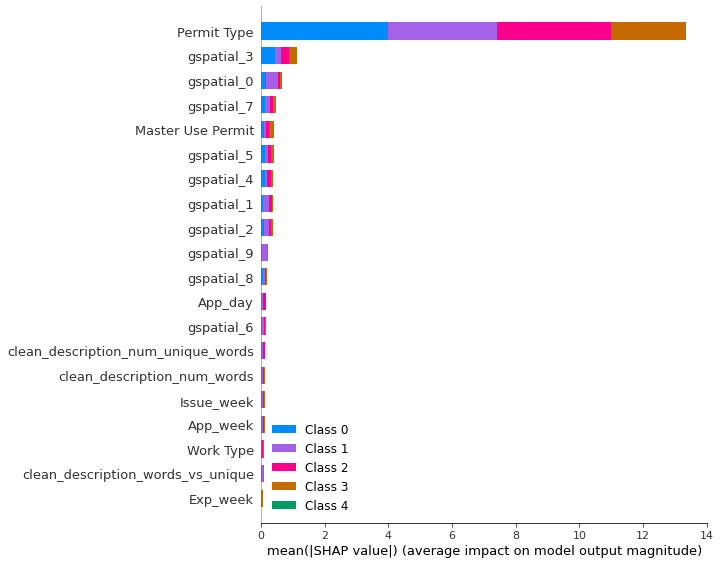

In [36]:
shap.summary_plot(shap_values, X)

In [39]:
print("\n The best score across ALL searched params:\n",
          catboost_model.best_score_)


 The best score across ALL searched params:
 {'learn': {'Accuracy': 0.9328933767989187, 'MultiClass': 0.20661417077055338}, 'validation': {'Accuracy': 0.8960047704233751, 'MultiClass': 0.2964083522007305}}


In [40]:
y_pred=catboost_model.predict(test_df)
y=train_df['Category']
y=le.fit_transform(y)
labels=y_pred.flatten()
test_df['Category']=le.inverse_transform(labels)
catboost_model1=pd.DataFrame(test_df,columns=['Application/Permit Number','Category'])
catboost_model1.to_csv('catsubmission.csv')

## TFIDF text features

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
print("\n[TF-IDF] Term Frequency Inverse Document Frequency Stage")
df1=pd.DataFrame()
train_df_1=pd.DataFrame()
test_df_1=pd.DataFrame()
def tfidf(df):
    v = TfidfVectorizer(max_features=20)
    x= v.fit_transform(df['clean_description_nos_removed'])
    df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
    df = pd.concat([df, df1], axis=1)
    return df

train_df_1=tfidf(train_df)
test_df_1=tfidf(test_df)

train_df_1=train_df_1.drop(columns='clean_description_nos_removed',axis=1)
test_df_1=test_df_1.drop('clean_description_nos_removed',axis=1)


[TF-IDF] Term Frequency Inverse Document Frequency Stage


In [42]:
from sklearn.model_selection import train_test_split
y=train_df_1['Category']
X=train_df_1.drop('Category',axis=1)
y=le.fit_transform(y)
X_train, X_test, y_train, y_test= train_test_split(X,y,shuffle=True,test_size=0.25)

In [43]:
catboost_model=CatBoostClassifier(iterations=1500,
                                  depth=10,
                                  learning_rate=0.002,
                                  eval_metric='Accuracy',
                                  loss_function='MultiClass',
                                  task_type="GPU")
catboost_model.fit(X_train,y_train,cat_features=obj_col,eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7951817	test: 0.7914132	best: 0.7914132 (0)	total: 186ms	remaining: 4m 38s
1:	learn: 0.8003101	test: 0.7942755	best: 0.7942755 (1)	total: 320ms	remaining: 3m 59s
2:	learn: 0.8040868	test: 0.8001193	best: 0.8001193 (2)	total: 442ms	remaining: 3m 40s
3:	learn: 0.8058758	test: 0.7970185	best: 0.8001193 (2)	total: 552ms	remaining: 3m 26s
4:	learn: 0.8046434	test: 0.7988074	best: 0.8001193 (2)	total: 652ms	remaining: 3m 14s
5:	learn: 0.8054385	test: 0.7982111	best: 0.8001193 (2)	total: 764ms	remaining: 3m 10s
6:	learn: 0.8049614	test: 0.7991652	best: 0.8001193 (2)	total: 873ms	remaining: 3m 6s
7:	learn: 0.8048819	test: 0.7980918	best: 0.8001193 (2)	total: 974ms	remaining: 3m 1s
8:	learn: 0.8052000	test: 0.7988074	best: 0.8001193 (2)	total: 1.08s	remaining: 2m 59s
9:	learn: 0.8052397	test: 0.7998807	best: 0.8001193 (2)	total: 1.2s	remaining: 2m 58s
10:	learn: 0.8048819	test: 0.7994037	best: 0.8001193 (2)	total: 1.3s	remaining: 2m 56s
11:	learn: 0.8040073	test: 0.7994037	best: 0.8

93:	learn: 0.8051205	test: 0.8010733	best: 0.8015504 (20)	total: 10.4s	remaining: 2m 35s
94:	learn: 0.8053192	test: 0.8008348	best: 0.8015504 (20)	total: 10.5s	remaining: 2m 35s
95:	learn: 0.8052000	test: 0.8008348	best: 0.8015504 (20)	total: 10.6s	remaining: 2m 35s
96:	learn: 0.8053590	test: 0.8010733	best: 0.8015504 (20)	total: 10.7s	remaining: 2m 34s
97:	learn: 0.8052795	test: 0.8010733	best: 0.8015504 (20)	total: 10.8s	remaining: 2m 34s
98:	learn: 0.8056373	test: 0.8010733	best: 0.8015504 (20)	total: 10.9s	remaining: 2m 34s
99:	learn: 0.8054385	test: 0.8013119	best: 0.8015504 (20)	total: 11s	remaining: 2m 34s
100:	learn: 0.8054783	test: 0.8013119	best: 0.8015504 (20)	total: 11.1s	remaining: 2m 34s
101:	learn: 0.8055578	test: 0.8015504	best: 0.8015504 (20)	total: 11.3s	remaining: 2m 34s
102:	learn: 0.8056373	test: 0.8016696	best: 0.8016696 (102)	total: 11.4s	remaining: 2m 34s
103:	learn: 0.8055975	test: 0.8017889	best: 0.8017889 (103)	total: 11.5s	remaining: 2m 33s
104:	learn: 0.805

185:	learn: 0.8077045	test: 0.8039356	best: 0.8041741 (177)	total: 20.2s	remaining: 2m 22s
186:	learn: 0.8076648	test: 0.8042934	best: 0.8042934 (186)	total: 20.3s	remaining: 2m 22s
187:	learn: 0.8076250	test: 0.8045319	best: 0.8045319 (187)	total: 20.4s	remaining: 2m 22s
188:	learn: 0.8075455	test: 0.8041741	best: 0.8045319 (187)	total: 20.5s	remaining: 2m 22s
189:	learn: 0.8075455	test: 0.8041741	best: 0.8045319 (187)	total: 20.6s	remaining: 2m 22s
190:	learn: 0.8074263	test: 0.8039356	best: 0.8045319 (187)	total: 20.7s	remaining: 2m 22s
191:	learn: 0.8075058	test: 0.8040549	best: 0.8045319 (187)	total: 20.8s	remaining: 2m 21s
192:	learn: 0.8077045	test: 0.8040549	best: 0.8045319 (187)	total: 20.9s	remaining: 2m 21s
193:	learn: 0.8076250	test: 0.8044126	best: 0.8045319 (187)	total: 21s	remaining: 2m 21s
194:	learn: 0.8077443	test: 0.8044126	best: 0.8045319 (187)	total: 21.1s	remaining: 2m 21s
195:	learn: 0.8076250	test: 0.8045319	best: 0.8045319 (187)	total: 21.3s	remaining: 2m 21s
1

277:	learn: 0.8098513	test: 0.8059630	best: 0.8059630 (276)	total: 30s	remaining: 2m 12s
278:	learn: 0.8098116	test: 0.8058438	best: 0.8059630 (276)	total: 30.2s	remaining: 2m 11s
279:	learn: 0.8099706	test: 0.8058438	best: 0.8059630 (276)	total: 30.3s	remaining: 2m 11s
280:	learn: 0.8100501	test: 0.8060823	best: 0.8060823 (280)	total: 30.4s	remaining: 2m 11s
281:	learn: 0.8100898	test: 0.8060823	best: 0.8060823 (280)	total: 30.5s	remaining: 2m 11s
282:	learn: 0.8100501	test: 0.8062016	best: 0.8062016 (282)	total: 30.6s	remaining: 2m 11s
283:	learn: 0.8101296	test: 0.8060823	best: 0.8062016 (282)	total: 30.7s	remaining: 2m 11s
284:	learn: 0.8102091	test: 0.8060823	best: 0.8062016 (282)	total: 30.8s	remaining: 2m 11s
285:	learn: 0.8101296	test: 0.8062016	best: 0.8062016 (282)	total: 30.9s	remaining: 2m 11s
286:	learn: 0.8100103	test: 0.8062016	best: 0.8062016 (282)	total: 31s	remaining: 2m 11s
287:	learn: 0.8100898	test: 0.8063208	best: 0.8063208 (287)	total: 31.1s	remaining: 2m 10s
288

370:	learn: 0.8115608	test: 0.8072749	best: 0.8075134 (369)	total: 40.1s	remaining: 2m 2s
371:	learn: 0.8114813	test: 0.8073942	best: 0.8075134 (369)	total: 40.2s	remaining: 2m 2s
372:	learn: 0.8116403	test: 0.8073942	best: 0.8075134 (369)	total: 40.3s	remaining: 2m 1s
373:	learn: 0.8116403	test: 0.8073942	best: 0.8075134 (369)	total: 40.5s	remaining: 2m 1s
374:	learn: 0.8116403	test: 0.8075134	best: 0.8075134 (369)	total: 40.6s	remaining: 2m 1s
375:	learn: 0.8117198	test: 0.8072749	best: 0.8075134 (369)	total: 40.7s	remaining: 2m 1s
376:	learn: 0.8117596	test: 0.8072749	best: 0.8075134 (369)	total: 40.8s	remaining: 2m 1s
377:	learn: 0.8117993	test: 0.8072749	best: 0.8075134 (369)	total: 40.9s	remaining: 2m 1s
378:	learn: 0.8117993	test: 0.8072749	best: 0.8075134 (369)	total: 41s	remaining: 2m 1s
379:	learn: 0.8117993	test: 0.8073942	best: 0.8075134 (369)	total: 41.1s	remaining: 2m 1s
380:	learn: 0.8117596	test: 0.8072749	best: 0.8075134 (369)	total: 41.3s	remaining: 2m 1s
381:	learn: 

462:	learn: 0.8134293	test: 0.8084675	best: 0.8088253 (436)	total: 50.2s	remaining: 1m 52s
463:	learn: 0.8133498	test: 0.8084675	best: 0.8088253 (436)	total: 50.3s	remaining: 1m 52s
464:	learn: 0.8134690	test: 0.8087060	best: 0.8088253 (436)	total: 50.4s	remaining: 1m 52s
465:	learn: 0.8134293	test: 0.8088253	best: 0.8088253 (436)	total: 50.5s	remaining: 1m 52s
466:	learn: 0.8135088	test: 0.8089445	best: 0.8089445 (466)	total: 50.6s	remaining: 1m 52s
467:	learn: 0.8135883	test: 0.8089445	best: 0.8089445 (466)	total: 50.8s	remaining: 1m 51s
468:	learn: 0.8136678	test: 0.8088253	best: 0.8089445 (466)	total: 50.9s	remaining: 1m 51s
469:	learn: 0.8136678	test: 0.8088253	best: 0.8089445 (466)	total: 51s	remaining: 1m 51s
470:	learn: 0.8136281	test: 0.8087060	best: 0.8089445 (466)	total: 51.1s	remaining: 1m 51s
471:	learn: 0.8137076	test: 0.8087060	best: 0.8089445 (466)	total: 51.2s	remaining: 1m 51s
472:	learn: 0.8136678	test: 0.8089445	best: 0.8089445 (466)	total: 51.3s	remaining: 1m 51s
4

554:	learn: 0.8155363	test: 0.8094216	best: 0.8095408 (502)	total: 1m	remaining: 1m 42s
555:	learn: 0.8154965	test: 0.8094216	best: 0.8095408 (502)	total: 1m	remaining: 1m 42s
556:	learn: 0.8154965	test: 0.8094216	best: 0.8095408 (502)	total: 1m	remaining: 1m 42s
557:	learn: 0.8155363	test: 0.8094216	best: 0.8095408 (502)	total: 1m	remaining: 1m 42s
558:	learn: 0.8155363	test: 0.8093023	best: 0.8095408 (502)	total: 1m	remaining: 1m 42s
559:	learn: 0.8156556	test: 0.8094216	best: 0.8095408 (502)	total: 1m	remaining: 1m 42s
560:	learn: 0.8156158	test: 0.8093023	best: 0.8095408 (502)	total: 1m 1s	remaining: 1m 42s
561:	learn: 0.8156953	test: 0.8091831	best: 0.8095408 (502)	total: 1m 1s	remaining: 1m 42s
562:	learn: 0.8157748	test: 0.8093023	best: 0.8095408 (502)	total: 1m 1s	remaining: 1m 41s
563:	learn: 0.8156556	test: 0.8091831	best: 0.8095408 (502)	total: 1m 1s	remaining: 1m 41s
564:	learn: 0.8157351	test: 0.8093023	best: 0.8095408 (502)	total: 1m 1s	remaining: 1m 41s
565:	learn: 0.815

646:	learn: 0.8175638	test: 0.8101371	best: 0.8102564 (644)	total: 1m 10s	remaining: 1m 33s
647:	learn: 0.8174843	test: 0.8100179	best: 0.8102564 (644)	total: 1m 10s	remaining: 1m 32s
648:	learn: 0.8175241	test: 0.8100179	best: 0.8102564 (644)	total: 1m 10s	remaining: 1m 32s
649:	learn: 0.8175638	test: 0.8102564	best: 0.8102564 (644)	total: 1m 10s	remaining: 1m 32s
650:	learn: 0.8176036	test: 0.8101371	best: 0.8102564 (644)	total: 1m 11s	remaining: 1m 32s
651:	learn: 0.8176036	test: 0.8101371	best: 0.8102564 (644)	total: 1m 11s	remaining: 1m 32s
652:	learn: 0.8176831	test: 0.8100179	best: 0.8102564 (644)	total: 1m 11s	remaining: 1m 32s
653:	learn: 0.8177228	test: 0.8101371	best: 0.8102564 (644)	total: 1m 11s	remaining: 1m 32s
654:	learn: 0.8177626	test: 0.8100179	best: 0.8102564 (644)	total: 1m 11s	remaining: 1m 32s
655:	learn: 0.8179216	test: 0.8100179	best: 0.8102564 (644)	total: 1m 11s	remaining: 1m 32s
656:	learn: 0.8180011	test: 0.8100179	best: 0.8102564 (644)	total: 1m 11s	remain

736:	learn: 0.8197106	test: 0.8110912	best: 0.8114490 (725)	total: 1m 20s	remaining: 1m 23s
737:	learn: 0.8197106	test: 0.8108527	best: 0.8114490 (725)	total: 1m 20s	remaining: 1m 23s
738:	learn: 0.8196708	test: 0.8108527	best: 0.8114490 (725)	total: 1m 20s	remaining: 1m 22s
739:	learn: 0.8196708	test: 0.8112105	best: 0.8114490 (725)	total: 1m 20s	remaining: 1m 22s
740:	learn: 0.8196311	test: 0.8109720	best: 0.8114490 (725)	total: 1m 20s	remaining: 1m 22s
741:	learn: 0.8197106	test: 0.8112105	best: 0.8114490 (725)	total: 1m 20s	remaining: 1m 22s
742:	learn: 0.8197106	test: 0.8112105	best: 0.8114490 (725)	total: 1m 21s	remaining: 1m 22s
743:	learn: 0.8198298	test: 0.8112105	best: 0.8114490 (725)	total: 1m 21s	remaining: 1m 22s
744:	learn: 0.8198298	test: 0.8112105	best: 0.8114490 (725)	total: 1m 21s	remaining: 1m 22s
745:	learn: 0.8199889	test: 0.8110912	best: 0.8114490 (725)	total: 1m 21s	remaining: 1m 22s
746:	learn: 0.8200684	test: 0.8110912	best: 0.8114490 (725)	total: 1m 21s	remain

826:	learn: 0.8213008	test: 0.8122838	best: 0.8124031 (818)	total: 1m 30s	remaining: 1m 13s
827:	learn: 0.8213803	test: 0.8122838	best: 0.8124031 (818)	total: 1m 30s	remaining: 1m 13s
828:	learn: 0.8214598	test: 0.8122838	best: 0.8124031 (818)	total: 1m 30s	remaining: 1m 13s
829:	learn: 0.8212610	test: 0.8125224	best: 0.8125224 (829)	total: 1m 30s	remaining: 1m 13s
830:	learn: 0.8212610	test: 0.8125224	best: 0.8125224 (829)	total: 1m 30s	remaining: 1m 13s
831:	learn: 0.8213008	test: 0.8125224	best: 0.8125224 (829)	total: 1m 31s	remaining: 1m 13s
832:	learn: 0.8212213	test: 0.8124031	best: 0.8125224 (829)	total: 1m 31s	remaining: 1m 13s
833:	learn: 0.8212610	test: 0.8121646	best: 0.8125224 (829)	total: 1m 31s	remaining: 1m 12s
834:	learn: 0.8213008	test: 0.8124031	best: 0.8125224 (829)	total: 1m 31s	remaining: 1m 12s
835:	learn: 0.8213008	test: 0.8124031	best: 0.8125224 (829)	total: 1m 31s	remaining: 1m 12s
836:	learn: 0.8213405	test: 0.8124031	best: 0.8125224 (829)	total: 1m 31s	remain

916:	learn: 0.8232488	test: 0.8133572	best: 0.8133572 (908)	total: 1m 40s	remaining: 1m 3s
917:	learn: 0.8232488	test: 0.8133572	best: 0.8133572 (908)	total: 1m 40s	remaining: 1m 3s
918:	learn: 0.8232488	test: 0.8134764	best: 0.8134764 (918)	total: 1m 40s	remaining: 1m 3s
919:	learn: 0.8232090	test: 0.8134764	best: 0.8134764 (918)	total: 1m 40s	remaining: 1m 3s
920:	learn: 0.8232488	test: 0.8134764	best: 0.8134764 (918)	total: 1m 41s	remaining: 1m 3s
921:	learn: 0.8232090	test: 0.8135957	best: 0.8135957 (921)	total: 1m 41s	remaining: 1m 3s
922:	learn: 0.8231693	test: 0.8135957	best: 0.8135957 (921)	total: 1m 41s	remaining: 1m 3s
923:	learn: 0.8231693	test: 0.8137150	best: 0.8137150 (923)	total: 1m 41s	remaining: 1m 3s
924:	learn: 0.8232090	test: 0.8137150	best: 0.8137150 (923)	total: 1m 41s	remaining: 1m 3s
925:	learn: 0.8231295	test: 0.8138342	best: 0.8138342 (925)	total: 1m 41s	remaining: 1m 2s
926:	learn: 0.8231295	test: 0.8138342	best: 0.8138342 (925)	total: 1m 41s	remaining: 1m 2s

1008:	learn: 0.8246005	test: 0.8153846	best: 0.8153846 (1001)	total: 1m 50s	remaining: 53.9s
1009:	learn: 0.8247197	test: 0.8153846	best: 0.8153846 (1001)	total: 1m 50s	remaining: 53.8s
1010:	learn: 0.8247197	test: 0.8153846	best: 0.8153846 (1001)	total: 1m 50s	remaining: 53.7s
1011:	learn: 0.8247197	test: 0.8155039	best: 0.8155039 (1011)	total: 1m 51s	remaining: 53.6s
1012:	learn: 0.8247595	test: 0.8156231	best: 0.8156231 (1012)	total: 1m 51s	remaining: 53.5s
1013:	learn: 0.8247595	test: 0.8155039	best: 0.8156231 (1012)	total: 1m 51s	remaining: 53.3s
1014:	learn: 0.8247992	test: 0.8155039	best: 0.8156231 (1012)	total: 1m 51s	remaining: 53.2s
1015:	learn: 0.8247595	test: 0.8153846	best: 0.8156231 (1012)	total: 1m 51s	remaining: 53.1s
1016:	learn: 0.8248390	test: 0.8155039	best: 0.8156231 (1012)	total: 1m 51s	remaining: 53s
1017:	learn: 0.8248390	test: 0.8155039	best: 0.8156231 (1012)	total: 1m 51s	remaining: 52.9s
1018:	learn: 0.8248390	test: 0.8155039	best: 0.8156231 (1012)	total: 1m 

1097:	learn: 0.8263099	test: 0.8166965	best: 0.8169350 (1090)	total: 2m	remaining: 44.1s
1098:	learn: 0.8263099	test: 0.8168157	best: 0.8169350 (1090)	total: 2m	remaining: 44s
1099:	learn: 0.8263497	test: 0.8168157	best: 0.8169350 (1090)	total: 2m	remaining: 43.9s
1100:	learn: 0.8263497	test: 0.8166965	best: 0.8169350 (1090)	total: 2m	remaining: 43.7s
1101:	learn: 0.8263497	test: 0.8169350	best: 0.8169350 (1090)	total: 2m	remaining: 43.6s
1102:	learn: 0.8263497	test: 0.8168157	best: 0.8169350 (1090)	total: 2m	remaining: 43.5s
1103:	learn: 0.8263099	test: 0.8168157	best: 0.8169350 (1090)	total: 2m 1s	remaining: 43.4s
1104:	learn: 0.8263497	test: 0.8166965	best: 0.8169350 (1090)	total: 2m 1s	remaining: 43.3s
1105:	learn: 0.8263497	test: 0.8168157	best: 0.8169350 (1090)	total: 2m 1s	remaining: 43.2s
1106:	learn: 0.8264292	test: 0.8166965	best: 0.8169350 (1090)	total: 2m 1s	remaining: 43.1s
1107:	learn: 0.8263894	test: 0.8166965	best: 0.8169350 (1090)	total: 2m 1s	remaining: 43s
1108:	lear

1187:	learn: 0.8279001	test: 0.8181276	best: 0.8182469 (1155)	total: 2m 10s	remaining: 34.2s
1188:	learn: 0.8279399	test: 0.8181276	best: 0.8182469 (1155)	total: 2m 10s	remaining: 34.1s
1189:	learn: 0.8278604	test: 0.8181276	best: 0.8182469 (1155)	total: 2m 10s	remaining: 34s
1190:	learn: 0.8279399	test: 0.8181276	best: 0.8182469 (1155)	total: 2m 10s	remaining: 33.9s
1191:	learn: 0.8279796	test: 0.8181276	best: 0.8182469 (1155)	total: 2m 10s	remaining: 33.8s
1192:	learn: 0.8279796	test: 0.8181276	best: 0.8182469 (1155)	total: 2m 10s	remaining: 33.6s
1193:	learn: 0.8279399	test: 0.8181276	best: 0.8182469 (1155)	total: 2m 10s	remaining: 33.5s
1194:	learn: 0.8279001	test: 0.8181276	best: 0.8182469 (1155)	total: 2m 10s	remaining: 33.4s
1195:	learn: 0.8279001	test: 0.8181276	best: 0.8182469 (1155)	total: 2m 11s	remaining: 33.3s
1196:	learn: 0.8280194	test: 0.8182469	best: 0.8182469 (1155)	total: 2m 11s	remaining: 33.2s
1197:	learn: 0.8280194	test: 0.8183661	best: 0.8183661 (1197)	total: 2m 

1277:	learn: 0.8298481	test: 0.8190817	best: 0.8190817 (1277)	total: 2m 20s	remaining: 24.4s
1278:	learn: 0.8298879	test: 0.8190817	best: 0.8190817 (1277)	total: 2m 20s	remaining: 24.3s
1279:	learn: 0.8299674	test: 0.8194395	best: 0.8194395 (1279)	total: 2m 20s	remaining: 24.1s
1280:	learn: 0.8299674	test: 0.8194395	best: 0.8194395 (1279)	total: 2m 20s	remaining: 24s
1281:	learn: 0.8299674	test: 0.8194395	best: 0.8194395 (1279)	total: 2m 20s	remaining: 23.9s
1282:	learn: 0.8299674	test: 0.8194395	best: 0.8194395 (1279)	total: 2m 20s	remaining: 23.8s
1283:	learn: 0.8300072	test: 0.8194395	best: 0.8194395 (1279)	total: 2m 20s	remaining: 23.7s
1284:	learn: 0.8299674	test: 0.8194395	best: 0.8194395 (1279)	total: 2m 20s	remaining: 23.6s
1285:	learn: 0.8300072	test: 0.8194395	best: 0.8194395 (1279)	total: 2m 21s	remaining: 23.5s
1286:	learn: 0.8300469	test: 0.8194395	best: 0.8194395 (1279)	total: 2m 21s	remaining: 23.4s
1287:	learn: 0.8300867	test: 0.8194395	best: 0.8194395 (1279)	total: 2m 

1366:	learn: 0.8317564	test: 0.8208706	best: 0.8208706 (1350)	total: 2m 29s	remaining: 14.5s
1367:	learn: 0.8317564	test: 0.8208706	best: 0.8208706 (1350)	total: 2m 29s	remaining: 14.4s
1368:	learn: 0.8317564	test: 0.8208706	best: 0.8208706 (1350)	total: 2m 29s	remaining: 14.3s
1369:	learn: 0.8317564	test: 0.8208706	best: 0.8208706 (1350)	total: 2m 29s	remaining: 14.2s
1370:	learn: 0.8317564	test: 0.8208706	best: 0.8208706 (1350)	total: 2m 29s	remaining: 14.1s
1371:	learn: 0.8317564	test: 0.8207513	best: 0.8208706 (1350)	total: 2m 30s	remaining: 14s
1372:	learn: 0.8317564	test: 0.8209899	best: 0.8209899 (1372)	total: 2m 30s	remaining: 13.9s
1373:	learn: 0.8317961	test: 0.8209899	best: 0.8209899 (1372)	total: 2m 30s	remaining: 13.8s
1374:	learn: 0.8317961	test: 0.8209899	best: 0.8209899 (1372)	total: 2m 30s	remaining: 13.7s
1375:	learn: 0.8317961	test: 0.8209899	best: 0.8209899 (1372)	total: 2m 30s	remaining: 13.6s
1376:	learn: 0.8318359	test: 0.8208706	best: 0.8209899 (1372)	total: 2m 

1457:	learn: 0.8330683	test: 0.8212284	best: 0.8217054 (1404)	total: 2m 39s	remaining: 4.59s
1458:	learn: 0.8331876	test: 0.8212284	best: 0.8217054 (1404)	total: 2m 39s	remaining: 4.48s
1459:	learn: 0.8331478	test: 0.8212284	best: 0.8217054 (1404)	total: 2m 39s	remaining: 4.37s
1460:	learn: 0.8332273	test: 0.8212284	best: 0.8217054 (1404)	total: 2m 39s	remaining: 4.26s
1461:	learn: 0.8331478	test: 0.8212284	best: 0.8217054 (1404)	total: 2m 39s	remaining: 4.15s
1462:	learn: 0.8332273	test: 0.8212284	best: 0.8217054 (1404)	total: 2m 39s	remaining: 4.04s
1463:	learn: 0.8332273	test: 0.8213476	best: 0.8217054 (1404)	total: 2m 40s	remaining: 3.94s
1464:	learn: 0.8332671	test: 0.8212284	best: 0.8217054 (1404)	total: 2m 40s	remaining: 3.83s
1465:	learn: 0.8332273	test: 0.8213476	best: 0.8217054 (1404)	total: 2m 40s	remaining: 3.72s
1466:	learn: 0.8332671	test: 0.8213476	best: 0.8217054 (1404)	total: 2m 40s	remaining: 3.61s
1467:	learn: 0.8332671	test: 0.8213476	best: 0.8217054 (1404)	total: 2

### Explaining Dashboard

In [44]:
cat=['Permit Type', 'Action Type', 'Work Type', 'Applicant Name', 'Status', 'Contractor']
enc = OrdinalEncoder()
categorical_features = pd.DataFrame(enc.fit_transform(train_df_1[cat].values), columns=cat)
train_df_2=train_df_1.drop(columns=cat,axis=1)
train_df_2=pd.concat([categorical_features,train_df_2],axis=1)

In [45]:
from sklearn.model_selection import train_test_split
y=train_df_2['Category']
X=train_df_2.drop('Category',axis=1)
y=le.fit_transform(y)
X_train, X_test, y_train, y_test= train_test_split(X,y,shuffle=True,test_size=0.25)

In [46]:
catboost_model=CatBoostClassifier(iterations=1500,
                                  depth=10,
                                  learning_rate=0.002,
                                  eval_metric='Accuracy',
                                  loss_function='MultiClass',
                                  task_type="GPU")


catboost_model.fit(X_train,y_train,eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7812674	test: 0.7680382	best: 0.7680382 (0)	total: 91.4ms	remaining: 2m 16s
1:	learn: 0.7850839	test: 0.7724508	best: 0.7724508 (1)	total: 181ms	remaining: 2m 15s
2:	learn: 0.7869524	test: 0.7755516	best: 0.7755516 (2)	total: 264ms	remaining: 2m 11s
3:	learn: 0.7876680	test: 0.7749553	best: 0.7755516 (2)	total: 362ms	remaining: 2m 15s
4:	learn: 0.7874294	test: 0.7754323	best: 0.7755516 (2)	total: 444ms	remaining: 2m 12s
5:	learn: 0.7888209	test: 0.7756708	best: 0.7756708 (5)	total: 518ms	remaining: 2m 8s
6:	learn: 0.7897750	test: 0.7768634	best: 0.7768634 (6)	total: 594ms	remaining: 2m 6s
7:	learn: 0.7899340	test: 0.7776983	best: 0.7776983 (7)	total: 675ms	remaining: 2m 5s
8:	learn: 0.7903316	test: 0.7775790	best: 0.7776983 (7)	total: 754ms	remaining: 2m 4s
9:	learn: 0.7904111	test: 0.7782946	best: 0.7782946 (9)	total: 833ms	remaining: 2m 4s
10:	learn: 0.7904508	test: 0.7771020	best: 0.7782946 (9)	total: 913ms	remaining: 2m 3s
11:	learn: 0.7901328	test: 0.7772212	best: 0.77

94:	learn: 0.7914049	test: 0.7802027	best: 0.7803220 (93)	total: 7.57s	remaining: 1m 52s
95:	learn: 0.7915640	test: 0.7805605	best: 0.7805605 (95)	total: 7.65s	remaining: 1m 51s
96:	learn: 0.7918423	test: 0.7806798	best: 0.7806798 (96)	total: 7.72s	remaining: 1m 51s
97:	learn: 0.7917627	test: 0.7802027	best: 0.7806798 (96)	total: 7.81s	remaining: 1m 51s
98:	learn: 0.7918423	test: 0.7799642	best: 0.7806798 (96)	total: 7.88s	remaining: 1m 51s
99:	learn: 0.7918025	test: 0.7796064	best: 0.7806798 (96)	total: 7.95s	remaining: 1m 51s
100:	learn: 0.7918820	test: 0.7794872	best: 0.7806798 (96)	total: 8.03s	remaining: 1m 51s
101:	learn: 0.7919615	test: 0.7798450	best: 0.7806798 (96)	total: 8.11s	remaining: 1m 51s
102:	learn: 0.7918423	test: 0.7797257	best: 0.7806798 (96)	total: 8.19s	remaining: 1m 51s
103:	learn: 0.7918820	test: 0.7798450	best: 0.7806798 (96)	total: 8.28s	remaining: 1m 51s
104:	learn: 0.7919218	test: 0.7797257	best: 0.7806798 (96)	total: 8.35s	remaining: 1m 50s
105:	learn: 0.79

186:	learn: 0.7949829	test: 0.7834228	best: 0.7834228 (185)	total: 14.9s	remaining: 1m 44s
187:	learn: 0.7951022	test: 0.7831843	best: 0.7834228 (185)	total: 15s	remaining: 1m 44s
188:	learn: 0.7949034	test: 0.7833035	best: 0.7834228 (185)	total: 15s	remaining: 1m 44s
189:	learn: 0.7950227	test: 0.7833035	best: 0.7834228 (185)	total: 15.1s	remaining: 1m 44s
190:	learn: 0.7949829	test: 0.7834228	best: 0.7834228 (185)	total: 15.2s	remaining: 1m 44s
191:	learn: 0.7949432	test: 0.7835420	best: 0.7835420 (191)	total: 15.3s	remaining: 1m 43s
192:	learn: 0.7949432	test: 0.7835420	best: 0.7835420 (191)	total: 15.3s	remaining: 1m 43s
193:	learn: 0.7949432	test: 0.7835420	best: 0.7835420 (191)	total: 15.4s	remaining: 1m 43s
194:	learn: 0.7949432	test: 0.7836613	best: 0.7836613 (194)	total: 15.5s	remaining: 1m 43s
195:	learn: 0.7949432	test: 0.7834228	best: 0.7836613 (194)	total: 15.6s	remaining: 1m 43s
196:	learn: 0.7949432	test: 0.7831843	best: 0.7836613 (194)	total: 15.7s	remaining: 1m 43s
197

277:	learn: 0.7977260	test: 0.7862850	best: 0.7862850 (275)	total: 22.2s	remaining: 1m 37s
278:	learn: 0.7977658	test: 0.7864043	best: 0.7864043 (278)	total: 22.3s	remaining: 1m 37s
279:	learn: 0.7978055	test: 0.7861658	best: 0.7864043 (278)	total: 22.4s	remaining: 1m 37s
280:	learn: 0.7978453	test: 0.7862850	best: 0.7864043 (278)	total: 22.5s	remaining: 1m 37s
281:	learn: 0.7977260	test: 0.7862850	best: 0.7864043 (278)	total: 22.5s	remaining: 1m 37s
282:	learn: 0.7978453	test: 0.7862850	best: 0.7864043 (278)	total: 22.6s	remaining: 1m 37s
283:	learn: 0.7976465	test: 0.7862850	best: 0.7864043 (278)	total: 22.7s	remaining: 1m 37s
284:	learn: 0.7976465	test: 0.7865236	best: 0.7865236 (284)	total: 22.8s	remaining: 1m 37s
285:	learn: 0.7977260	test: 0.7866428	best: 0.7866428 (285)	total: 22.9s	remaining: 1m 37s
286:	learn: 0.7976863	test: 0.7866428	best: 0.7866428 (285)	total: 22.9s	remaining: 1m 36s
287:	learn: 0.7977658	test: 0.7866428	best: 0.7866428 (285)	total: 23s	remaining: 1m 36s
2

369:	learn: 0.8000716	test: 0.7887895	best: 0.7887895 (369)	total: 29.7s	remaining: 1m 30s
370:	learn: 0.8001113	test: 0.7887895	best: 0.7887895 (369)	total: 29.8s	remaining: 1m 30s
371:	learn: 0.8001908	test: 0.7885510	best: 0.7887895 (369)	total: 29.9s	remaining: 1m 30s
372:	learn: 0.8001908	test: 0.7887895	best: 0.7887895 (369)	total: 30s	remaining: 1m 30s
373:	learn: 0.8002306	test: 0.7889088	best: 0.7889088 (373)	total: 30.1s	remaining: 1m 30s
374:	learn: 0.8003498	test: 0.7887895	best: 0.7889088 (373)	total: 30.1s	remaining: 1m 30s
375:	learn: 0.8004294	test: 0.7887895	best: 0.7889088 (373)	total: 30.2s	remaining: 1m 30s
376:	learn: 0.8005486	test: 0.7886702	best: 0.7889088 (373)	total: 30.3s	remaining: 1m 30s
377:	learn: 0.8004691	test: 0.7889088	best: 0.7889088 (373)	total: 30.4s	remaining: 1m 30s
378:	learn: 0.8004294	test: 0.7887895	best: 0.7889088 (373)	total: 30.4s	remaining: 1m 30s
379:	learn: 0.8005486	test: 0.7889088	best: 0.7889088 (373)	total: 30.5s	remaining: 1m 29s
3

462:	learn: 0.8034110	test: 0.7895051	best: 0.7897436 (452)	total: 37.2s	remaining: 1m 23s
463:	learn: 0.8034507	test: 0.7895051	best: 0.7897436 (452)	total: 37.2s	remaining: 1m 23s
464:	learn: 0.8035700	test: 0.7897436	best: 0.7897436 (452)	total: 37.3s	remaining: 1m 23s
465:	learn: 0.8037290	test: 0.7898629	best: 0.7898629 (465)	total: 37.4s	remaining: 1m 23s
466:	learn: 0.8038483	test: 0.7897436	best: 0.7898629 (465)	total: 37.5s	remaining: 1m 22s
467:	learn: 0.8039278	test: 0.7898629	best: 0.7898629 (465)	total: 37.6s	remaining: 1m 22s
468:	learn: 0.8039278	test: 0.7901014	best: 0.7901014 (468)	total: 37.6s	remaining: 1m 22s
469:	learn: 0.8038880	test: 0.7899821	best: 0.7901014 (468)	total: 37.7s	remaining: 1m 22s
470:	learn: 0.8038085	test: 0.7901014	best: 0.7901014 (468)	total: 37.8s	remaining: 1m 22s
471:	learn: 0.8039676	test: 0.7899821	best: 0.7901014 (468)	total: 37.9s	remaining: 1m 22s
472:	learn: 0.8038880	test: 0.7898629	best: 0.7901014 (468)	total: 38s	remaining: 1m 22s
4

554:	learn: 0.8058360	test: 0.7923673	best: 0.7923673 (545)	total: 44.7s	remaining: 1m 16s
555:	learn: 0.8058360	test: 0.7923673	best: 0.7923673 (545)	total: 44.8s	remaining: 1m 16s
556:	learn: 0.8059156	test: 0.7922481	best: 0.7923673 (545)	total: 44.9s	remaining: 1m 16s
557:	learn: 0.8059156	test: 0.7923673	best: 0.7923673 (545)	total: 45s	remaining: 1m 15s
558:	learn: 0.8059553	test: 0.7923673	best: 0.7923673 (545)	total: 45s	remaining: 1m 15s
559:	learn: 0.8059156	test: 0.7923673	best: 0.7923673 (545)	total: 45.1s	remaining: 1m 15s
560:	learn: 0.8059156	test: 0.7923673	best: 0.7923673 (545)	total: 45.2s	remaining: 1m 15s
561:	learn: 0.8059951	test: 0.7923673	best: 0.7923673 (545)	total: 45.3s	remaining: 1m 15s
562:	learn: 0.8060348	test: 0.7922481	best: 0.7923673 (545)	total: 45.4s	remaining: 1m 15s
563:	learn: 0.8061143	test: 0.7923673	best: 0.7923673 (545)	total: 45.4s	remaining: 1m 15s
564:	learn: 0.8060348	test: 0.7923673	best: 0.7923673 (545)	total: 45.5s	remaining: 1m 15s
565

645:	learn: 0.8076250	test: 0.7941562	best: 0.7942755 (643)	total: 52.1s	remaining: 1m 8s
646:	learn: 0.8076648	test: 0.7945140	best: 0.7945140 (646)	total: 52.2s	remaining: 1m 8s
647:	learn: 0.8077443	test: 0.7943948	best: 0.7945140 (646)	total: 52.3s	remaining: 1m 8s
648:	learn: 0.8077443	test: 0.7943948	best: 0.7945140 (646)	total: 52.4s	remaining: 1m 8s
649:	learn: 0.8077443	test: 0.7945140	best: 0.7945140 (646)	total: 52.5s	remaining: 1m 8s
650:	learn: 0.8077045	test: 0.7948718	best: 0.7948718 (650)	total: 52.5s	remaining: 1m 8s
651:	learn: 0.8078238	test: 0.7947525	best: 0.7948718 (650)	total: 52.6s	remaining: 1m 8s
652:	learn: 0.8079033	test: 0.7949911	best: 0.7949911 (652)	total: 52.7s	remaining: 1m 8s
653:	learn: 0.8079828	test: 0.7948718	best: 0.7949911 (652)	total: 52.8s	remaining: 1m 8s
654:	learn: 0.8080623	test: 0.7949911	best: 0.7949911 (652)	total: 52.9s	remaining: 1m 8s
655:	learn: 0.8081021	test: 0.7947525	best: 0.7949911 (652)	total: 53s	remaining: 1m 8s
656:	learn: 

737:	learn: 0.8099308	test: 0.7964222	best: 0.7967800 (722)	total: 1m	remaining: 1m 1s
738:	learn: 0.8100898	test: 0.7964222	best: 0.7967800 (722)	total: 1m	remaining: 1m 1s
739:	learn: 0.8100501	test: 0.7967800	best: 0.7967800 (722)	total: 1m	remaining: 1m 1s
740:	learn: 0.8100103	test: 0.7966607	best: 0.7967800 (722)	total: 1m	remaining: 1m 1s
741:	learn: 0.8099706	test: 0.7967800	best: 0.7967800 (722)	total: 1m	remaining: 1m 1s
742:	learn: 0.8100103	test: 0.7967800	best: 0.7967800 (722)	total: 1m	remaining: 1m 1s
743:	learn: 0.8099706	test: 0.7967800	best: 0.7967800 (722)	total: 1m	remaining: 1m 1s
744:	learn: 0.8100898	test: 0.7968992	best: 0.7968992 (744)	total: 1m	remaining: 1m 1s
745:	learn: 0.8100898	test: 0.7968992	best: 0.7968992 (744)	total: 1m	remaining: 1m 1s
746:	learn: 0.8102489	test: 0.7971377	best: 0.7971377 (746)	total: 1m	remaining: 1m 1s
747:	learn: 0.8102091	test: 0.7971377	best: 0.7971377 (746)	total: 1m	remaining: 1m 1s
748:	learn: 0.8103681	test: 0.7971377	best:

831:	learn: 0.8122366	test: 0.7992844	best: 0.7992844 (831)	total: 1m 7s	remaining: 54.6s
832:	learn: 0.8121969	test: 0.7994037	best: 0.7994037 (832)	total: 1m 8s	remaining: 54.5s
833:	learn: 0.8121571	test: 0.7990459	best: 0.7994037 (832)	total: 1m 8s	remaining: 54.4s
834:	learn: 0.8121174	test: 0.7990459	best: 0.7994037 (832)	total: 1m 8s	remaining: 54.3s
835:	learn: 0.8121571	test: 0.7990459	best: 0.7994037 (832)	total: 1m 8s	remaining: 54.2s
836:	learn: 0.8121969	test: 0.7990459	best: 0.7994037 (832)	total: 1m 8s	remaining: 54.2s
837:	learn: 0.8121969	test: 0.7990459	best: 0.7994037 (832)	total: 1m 8s	remaining: 54.1s
838:	learn: 0.8121571	test: 0.7991652	best: 0.7994037 (832)	total: 1m 8s	remaining: 54s
839:	learn: 0.8121571	test: 0.7990459	best: 0.7994037 (832)	total: 1m 8s	remaining: 53.9s
840:	learn: 0.8121969	test: 0.7990459	best: 0.7994037 (832)	total: 1m 8s	remaining: 53.8s
841:	learn: 0.8121571	test: 0.7992844	best: 0.7994037 (832)	total: 1m 8s	remaining: 53.8s
842:	learn: 

922:	learn: 0.8137076	test: 0.8013119	best: 0.8013119 (922)	total: 1m 15s	remaining: 47.3s
923:	learn: 0.8136678	test: 0.8010733	best: 0.8013119 (922)	total: 1m 15s	remaining: 47.2s
924:	learn: 0.8137076	test: 0.8011926	best: 0.8013119 (922)	total: 1m 15s	remaining: 47.1s
925:	learn: 0.8138666	test: 0.8010733	best: 0.8013119 (922)	total: 1m 15s	remaining: 47s
926:	learn: 0.8138268	test: 0.8011926	best: 0.8013119 (922)	total: 1m 15s	remaining: 47s
927:	learn: 0.8139063	test: 0.8010733	best: 0.8013119 (922)	total: 1m 16s	remaining: 46.9s
928:	learn: 0.8138666	test: 0.8013119	best: 0.8013119 (922)	total: 1m 16s	remaining: 46.8s
929:	learn: 0.8139461	test: 0.8014311	best: 0.8014311 (929)	total: 1m 16s	remaining: 46.7s
930:	learn: 0.8139858	test: 0.8017889	best: 0.8017889 (930)	total: 1m 16s	remaining: 46.6s
931:	learn: 0.8141051	test: 0.8017889	best: 0.8017889 (930)	total: 1m 16s	remaining: 46.6s
932:	learn: 0.8140256	test: 0.8017889	best: 0.8017889 (930)	total: 1m 16s	remaining: 46.5s
933

1013:	learn: 0.8152580	test: 0.8036971	best: 0.8039356 (1007)	total: 1m 23s	remaining: 40s
1014:	learn: 0.8152183	test: 0.8035778	best: 0.8039356 (1007)	total: 1m 23s	remaining: 40s
1015:	learn: 0.8152580	test: 0.8035778	best: 0.8039356 (1007)	total: 1m 23s	remaining: 39.9s
1016:	learn: 0.8153375	test: 0.8034586	best: 0.8039356 (1007)	total: 1m 23s	remaining: 39.8s
1017:	learn: 0.8153773	test: 0.8034586	best: 0.8039356 (1007)	total: 1m 23s	remaining: 39.7s
1018:	learn: 0.8153375	test: 0.8034586	best: 0.8039356 (1007)	total: 1m 24s	remaining: 39.7s
1019:	learn: 0.8150195	test: 0.8034586	best: 0.8039356 (1007)	total: 1m 24s	remaining: 39.6s
1020:	learn: 0.8150990	test: 0.8036971	best: 0.8039356 (1007)	total: 1m 24s	remaining: 39.5s
1021:	learn: 0.8151785	test: 0.8036971	best: 0.8039356 (1007)	total: 1m 24s	remaining: 39.4s
1022:	learn: 0.8155761	test: 0.8036971	best: 0.8039356 (1007)	total: 1m 24s	remaining: 39.3s
1023:	learn: 0.8155761	test: 0.8036971	best: 0.8039356 (1007)	total: 1m 24

1102:	learn: 0.8172458	test: 0.8048897	best: 0.8050089 (1092)	total: 1m 31s	remaining: 32.8s
1103:	learn: 0.8174048	test: 0.8051282	best: 0.8051282 (1103)	total: 1m 31s	remaining: 32.7s
1104:	learn: 0.8174445	test: 0.8051282	best: 0.8051282 (1103)	total: 1m 31s	remaining: 32.7s
1105:	learn: 0.8174445	test: 0.8051282	best: 0.8051282 (1103)	total: 1m 31s	remaining: 32.6s
1106:	learn: 0.8174445	test: 0.8051282	best: 0.8051282 (1103)	total: 1m 31s	remaining: 32.5s
1107:	learn: 0.8174843	test: 0.8051282	best: 0.8051282 (1103)	total: 1m 31s	remaining: 32.5s
1108:	learn: 0.8176831	test: 0.8051282	best: 0.8051282 (1103)	total: 1m 31s	remaining: 32.4s
1109:	learn: 0.8176036	test: 0.8052475	best: 0.8052475 (1109)	total: 1m 31s	remaining: 32.3s
1110:	learn: 0.8176831	test: 0.8056052	best: 0.8056052 (1110)	total: 1m 32s	remaining: 32.2s
1111:	learn: 0.8176831	test: 0.8053667	best: 0.8056052 (1110)	total: 1m 32s	remaining: 32.1s
1112:	learn: 0.8176831	test: 0.8056052	best: 0.8056052 (1110)	total: 1

1192:	learn: 0.8188757	test: 0.8069171	best: 0.8069171 (1189)	total: 1m 38s	remaining: 25.4s
1193:	learn: 0.8188757	test: 0.8069171	best: 0.8069171 (1189)	total: 1m 38s	remaining: 25.4s
1194:	learn: 0.8189155	test: 0.8069171	best: 0.8069171 (1189)	total: 1m 39s	remaining: 25.3s
1195:	learn: 0.8189155	test: 0.8070364	best: 0.8070364 (1195)	total: 1m 39s	remaining: 25.2s
1196:	learn: 0.8189155	test: 0.8071556	best: 0.8071556 (1196)	total: 1m 39s	remaining: 25.1s
1197:	learn: 0.8189155	test: 0.8070364	best: 0.8071556 (1196)	total: 1m 39s	remaining: 25s
1198:	learn: 0.8188757	test: 0.8072749	best: 0.8072749 (1198)	total: 1m 39s	remaining: 24.9s
1199:	learn: 0.8188757	test: 0.8073942	best: 0.8073942 (1199)	total: 1m 39s	remaining: 24.9s
1200:	learn: 0.8189950	test: 0.8073942	best: 0.8073942 (1199)	total: 1m 39s	remaining: 24.8s
1201:	learn: 0.8190745	test: 0.8073942	best: 0.8073942 (1199)	total: 1m 39s	remaining: 24.7s
1202:	learn: 0.8191938	test: 0.8072749	best: 0.8073942 (1199)	total: 1m 

1282:	learn: 0.8206647	test: 0.8085868	best: 0.8085868 (1280)	total: 1m 46s	remaining: 18s
1283:	learn: 0.8206647	test: 0.8087060	best: 0.8087060 (1283)	total: 1m 46s	remaining: 17.9s
1284:	learn: 0.8207045	test: 0.8085868	best: 0.8087060 (1283)	total: 1m 46s	remaining: 17.8s
1285:	learn: 0.8208237	test: 0.8087060	best: 0.8087060 (1283)	total: 1m 46s	remaining: 17.7s
1286:	learn: 0.8207840	test: 0.8087060	best: 0.8087060 (1283)	total: 1m 46s	remaining: 17.7s
1287:	learn: 0.8208237	test: 0.8087060	best: 0.8087060 (1283)	total: 1m 46s	remaining: 17.6s
1288:	learn: 0.8208635	test: 0.8087060	best: 0.8087060 (1283)	total: 1m 46s	remaining: 17.5s
1289:	learn: 0.8209430	test: 0.8088253	best: 0.8088253 (1289)	total: 1m 47s	remaining: 17.4s
1290:	learn: 0.8209032	test: 0.8088253	best: 0.8088253 (1289)	total: 1m 47s	remaining: 17.3s
1291:	learn: 0.8210225	test: 0.8089445	best: 0.8089445 (1291)	total: 1m 47s	remaining: 17.3s
1292:	learn: 0.8211020	test: 0.8089445	best: 0.8089445 (1291)	total: 1m 

1371:	learn: 0.8226525	test: 0.8091831	best: 0.8094216 (1321)	total: 1m 54s	remaining: 10.7s
1372:	learn: 0.8226922	test: 0.8091831	best: 0.8094216 (1321)	total: 1m 54s	remaining: 10.6s
1373:	learn: 0.8226525	test: 0.8094216	best: 0.8094216 (1321)	total: 1m 54s	remaining: 10.5s
1374:	learn: 0.8227717	test: 0.8094216	best: 0.8094216 (1321)	total: 1m 54s	remaining: 10.4s
1375:	learn: 0.8227717	test: 0.8095408	best: 0.8095408 (1375)	total: 1m 54s	remaining: 10.3s
1376:	learn: 0.8227717	test: 0.8095408	best: 0.8095408 (1375)	total: 1m 54s	remaining: 10.2s
1377:	learn: 0.8228115	test: 0.8096601	best: 0.8096601 (1377)	total: 1m 54s	remaining: 10.2s
1378:	learn: 0.8228115	test: 0.8096601	best: 0.8096601 (1377)	total: 1m 54s	remaining: 10.1s
1379:	learn: 0.8228512	test: 0.8097794	best: 0.8097794 (1379)	total: 1m 54s	remaining: 9.99s
1380:	learn: 0.8228910	test: 0.8097794	best: 0.8097794 (1379)	total: 1m 54s	remaining: 9.9s
1381:	learn: 0.8228910	test: 0.8098986	best: 0.8098986 (1381)	total: 1m

1460:	learn: 0.8241632	test: 0.8115683	best: 0.8115683 (1460)	total: 2m 1s	remaining: 3.25s
1461:	learn: 0.8241632	test: 0.8115683	best: 0.8115683 (1460)	total: 2m 2s	remaining: 3.17s
1462:	learn: 0.8243619	test: 0.8115683	best: 0.8115683 (1460)	total: 2m 2s	remaining: 3.09s
1463:	learn: 0.8244017	test: 0.8116875	best: 0.8116875 (1463)	total: 2m 2s	remaining: 3s
1464:	learn: 0.8244812	test: 0.8116875	best: 0.8116875 (1463)	total: 2m 2s	remaining: 2.92s
1465:	learn: 0.8245210	test: 0.8116875	best: 0.8116875 (1463)	total: 2m 2s	remaining: 2.84s
1466:	learn: 0.8245210	test: 0.8116875	best: 0.8116875 (1463)	total: 2m 2s	remaining: 2.75s
1467:	learn: 0.8244414	test: 0.8116875	best: 0.8116875 (1463)	total: 2m 2s	remaining: 2.67s
1468:	learn: 0.8244812	test: 0.8116875	best: 0.8116875 (1463)	total: 2m 2s	remaining: 2.59s
1469:	learn: 0.8246005	test: 0.8118068	best: 0.8118068 (1469)	total: 2m 2s	remaining: 2.5s
1470:	learn: 0.8246402	test: 0.8118068	best: 0.8118068 (1469)	total: 2m 2s	remaining

In [47]:
from explainerdashboard import ExplainerDashboard
from explainerdashboard import ClassifierExplainer

explainer = ClassifierExplainer(catboost_model, X_test, y_test,model_output='logodds')
ExplainerDashboard(explainer).run()

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pr auc curves...
Calculating prediction probabilities...
Calculating liftcurve_dfs...
Calculating classification_dfs...
Calculating pred_percentiles...
Calculating confusion matrices...
Calculating roc auc curves...
Calculating predictions...
Calculating metrics...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and rel

 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
192.168.43.149 - - [20/Apr/2021 12:53:47] "GET / HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:47] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1618483553.14.0.min.js HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:47] "GET /assets/bootstrap.min.css?m=1618484406.7008016 HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:47] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1618483553.8.7.min.js HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:47] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1618483553.14.0.min.js HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:47] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1618483553.7.2.min.js HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:47] "GET /_dash-component-suites/dash_table/bundle.v4_11_3m1618483556.js HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:48] "GET /_dash-component-suites/

192.168.43.149 - - [20/Apr/2021 12:53:57] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:57] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:57] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.43.149 - - [20/Apr/2021 12:53:57] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:58] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:58] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:58] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:58] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:58] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:59] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 12:53:59] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.43.149 - - [20/Apr/2021 

### Manual Changes

In [ ]:
# catboost_model_1=CatBoostClassifier(iterations=1500,
#                                   depth=10,
#                                   learning_rate=0.001,
#                                   eval_metric='Accuracy',
#                                   loss_function='MultiClass',
#                                   task_type="GPU")

# train_pool=Pool(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'])
# test_pool=Pool(X_test,y_test,cat_features=obj_col,text_features=['clean_description_nos_removed'])
# catboost_model_1.fit(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'],eval_set=(X_test,y_test),plot=True)


## from Hyperparameter secondDynamic CV Aproach best parameters

In [ ]:
# parameters={'nan_mode': 'Min',
#             'gpu_ram_part': 0.95,
#             'eval_metric': 'Accuracy', 
#             'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'], 'iterations': 15, 'fold_permutation_block': 64, 'leaf_estimation_method': 'Newton', 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'boosting_type': 'Plain', 'ctr_history_unit': 'Sample', 'feature_border_type': 'GreedyLogSum', 'one_hot_max_size': 2, 'devices': '0:1', 'l2_leaf_reg': 7, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False,'max_ctr_complexity': 1, 'gpu_cat_features_storage': 'GpuRam', 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'FeatureFreq:CtrBorderCount=15:CtrBorderType=MinEntropy:Prior=0/1'], 'use_best_model': False, 'class_names': [0, 1, 2, 3, 4], 'random_seed': 0, 'depth': 9, 'ctr_target_border_count': 1, 'has_time': False, 'border_count': 128,'data_partition': 'DocParallel', 'bagging_temperature': 1, 'classes_count': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'min_data_in_leaf': 1, 'loss_function': 'MultiClass', 'learning_rate': 0.7778555750846863, 'text_processing': {'dictionaries': [{'start_token_id': '0', 'occurrence_lower_bound': '5', 'skip_step': '0', 'end_of_word_token_policy': 'Insert', 'token_level_type': 'Word', 'end_of_sentence_token_policy': 'Skip', 'gram_order': '2', 'max_dictionary_size': '50000', 'dictionary_id': 'BiGram'}, {'start_token_id': '0', 'occurrence_lower_bound': '5', 'skip_step': '0', 'end_of_word_token_policy': 'Insert', 'token_level_type': 'Word', 'end_of_sentence_token_policy': 'Skip', 'gram_order': '1', 'max_dictionary_size': '50000', 'dictionary_id': 'Word'}], 'feature_processing': {'default': [{'dictionaries_names': ['BiGram', 'Word'], 'feature_calcers': ['BoW'], 'tokenizers_names': ['Space']}, {'dictionaries_names': ['Word'], 'feature_calcers': ['NaiveBayes'], 'tokenizers_names': ['Space']}]}, 'tokenizers': [{'number_token': '🔢', 'skip_empty': '1', 'number_process_policy': 'LeaveAsIs', 'tokenizer_id': 'Space', 'token_types': ['Number', 'Unknown', 'Word'], 'delimiter': ' ', 'languages': [], 'lemmatizing': '0', 'split_by_set': '0', 'lowercasing': '0', 'subtokens_policy': 'SingleToken', 'separator_type': 'ByDelimiter'}]}, 'score_function': 'Cosine', 'task_type': 'GPU', 'leaf_estimation_iterations': 1, 'bootstrap_type': 'Bayesian', 'max_leaves': 512, }

In [ ]:

# catboost_model_tuned=CatBoostClassifier(**parameters)
# catboost_model_tuned.fit(X_train,y_train,cat_features=obj_col,text_features=['clean_description_nos_removed'],eval_set=(X_test,y_test),plot=True)

In [ ]:
# y_pred=catboost_model_tuned.predict(test_df)
# y=train_df['Category']
# y=le.fit_transform(y)
# labels=y_pred.flatten()
# test_df['Category']=le.inverse_transform(labels)
# catboost_model_tune=pd.DataFrame(test_df,columns=['Application/Permit Number','Category'])
# catboost_model_tune.to_csv('catsubmission1.csv')

### Hyperparameter tuning


In [ ]:
# parameters = {'depth' : [4,5,6,7,8,9,10],
#                  'learning_rate' : [0.003,0.002,0.001,0.01,0.02,0.03,0.04,0.05],
#                   'iterations'  : [10, 20,30,40,50,60,70,80,90, 100,200,250,300,400,500,600,800]
#              }


In [ ]:
# y_1=train_df['Category']
# X_1=train_df.drop('Category',axis=1)
# y_1=le.fit_transform(y)
# X_train, X_test, y_train, y_test= train_test_split(X_1,y_1,shuffle=True,test_size=0.25)

# catboost_model_2=CatBoostClassifier(loss_function='MultiClass',eval_metric='Accuracy',task_type="GPU",cat_features=obj_col,text_features=['clean_description_nos_removed'])
# catboost_model_2.randomized_search(param_distributions=parameters,X=X_train,y=y_train,plot=True)
# print("\n The best score across ALL searched params:\n",
#           catboost_model_2.best_score_)
    


In [ ]:
# import shap
# train_pool=Pool(X_train,cat_features=obj_col,text_features=['clean_description_nos_removed'])
# test_pool=Pool(X_test,cat_features=obj_col,text_features=['clean_description_nos_removed'])

# explainer = shap.TreeExplainer(catboost_model_2)
# shap_values=explainer.shap_values(train_pool)
# shap.summary_plot(shap_values,test_pool)

### HyperParameter second Approach

In [ ]:
# from scipy.stats import uniform as sp_randFloat
# from scipy.stats import randint as sp_randInt  

# parameters = {'depth'         : sp_randInt(6, 10),
#               'learning_rate' : sp_randFloat(),
#               'l2_leaf_reg': [1, 3, 5, 7, 9, 11],
#               }
# cboost_rs=CatBoostClassifier(iterations=15,loss_function='MultiClass',eval_metric='Accuracy',task_type="GPU",devices='0:1',cat_features=obj_col,text_features=['clean_description_nos_removed'])
# cboost_rs.randomized_search(param_distributions=parameters,X=X_train,y=y_train,plot=True)


In [ ]:
# print("\n The best score across ALL searched params:\n",
#           cboost_rs.best_score_)
    
# print("\n The best parameters across ALL searched params:\n",
#           cboost_rs.get_all_params())

In [ ]:
# explainer = shap.TreeExplainer(cboost_rs)
# shap_values=explainer.shap_values(train_pool)
# shap.summary_plot(shap_values,test_pool)

In [ ]:
# text_unwanted=['clean_description_num_words','clean_description_num_unique_words','clean_description_words_vs_unique','clean_description_nos_removed']
# for col in text_unwanted:
#     if(col in list(train_df_1.columns.to_list())):
#         train_df_1=train_df_1.drop(columns=col,axis=1)
#         test_df_1=test_df_1.drop(columns=text_unwanted)